In [303]:
# importing the necessary libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [304]:
# loading the dataset
df = pd.read_excel('C:\\Users\\Ishaan Shakti\\Documents\\Great Lakes\\Capstone Project\\Project Work\\Customer Churn Data.xlsx', sheet_name = 'Data for DSBA')
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [305]:
df.tail()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,153.71,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,226.91,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191.42,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,179.9,Computer
11259,31259,0,8,1.0,22.0,Credit Card,Male,3.0,2,Super,3.0,Married,5,0.0,13,2,3,175.04,Mobile


In [306]:
df.shape

(11260, 19)

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [308]:
# viewing the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AccountID,11260.0,25629.500000,3250.626350,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,0.168384,0.374223,0.0,0.00,0.0,0.00,1.0
City_Tier,11148.0,1.653929,0.915015,1.0,1.00,1.0,3.00,3.0
CC_Contacted_LY,11158.0,17.867091,8.853269,4.0,11.00,16.0,23.00,132.0
Service_Score,11162.0,2.902526,0.725584,0.0,2.00,3.0,3.00,5.0
CC_Agent_Score,11144.0,3.066493,1.379772,1.0,2.00,3.0,4.00,5.0
Complain_ly,10903.0,0.285334,0.451594,0.0,0.00,0.0,1.00,1.0


In [309]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     102
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         112
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              102
Complain_ly                357
rev_growth_yoy               0
coupon_used_for_payment      0
Day_Since_CC_connect       357
cashback                   471
Login_device               221
dtype: int64

In [310]:
df.duplicated().sum()

0

## UNIVARIATE ANALYSIS

In [312]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [313]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [314]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [315]:
# Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

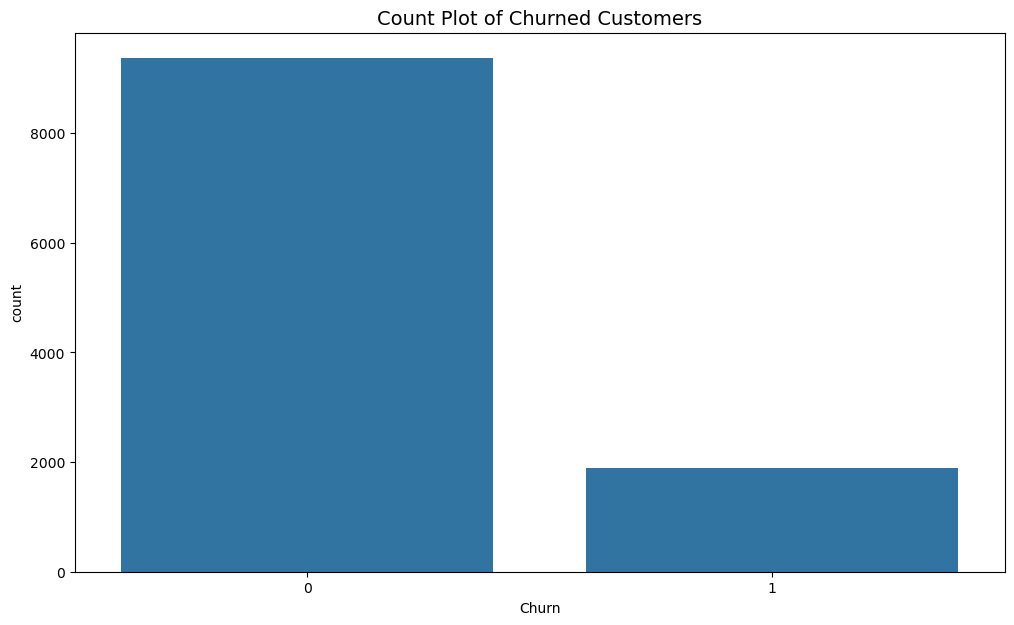

In [316]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Churn')
plt.title('Count Plot of Churned Customers', fontsize=14)
plt.xlabel('Churn')
plt.show()

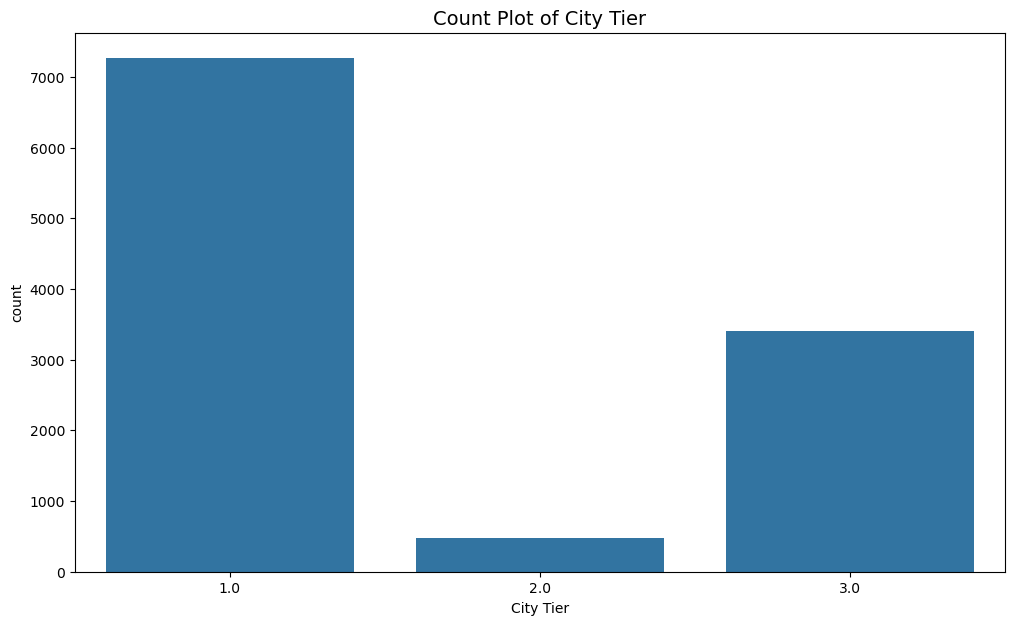

In [317]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'City_Tier')
plt.title('Count Plot of City Tier', fontsize=14)
plt.xlabel('City Tier')
plt.show()

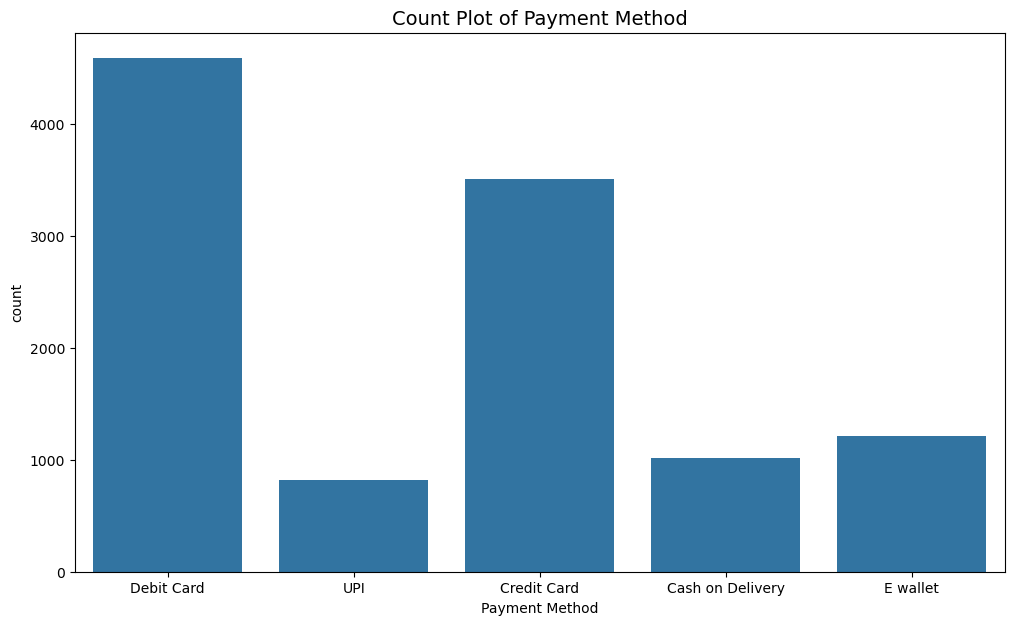

In [318]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Payment')
plt.title('Count Plot of Payment Method', fontsize=14)
plt.xlabel('Payment Method')
plt.show()

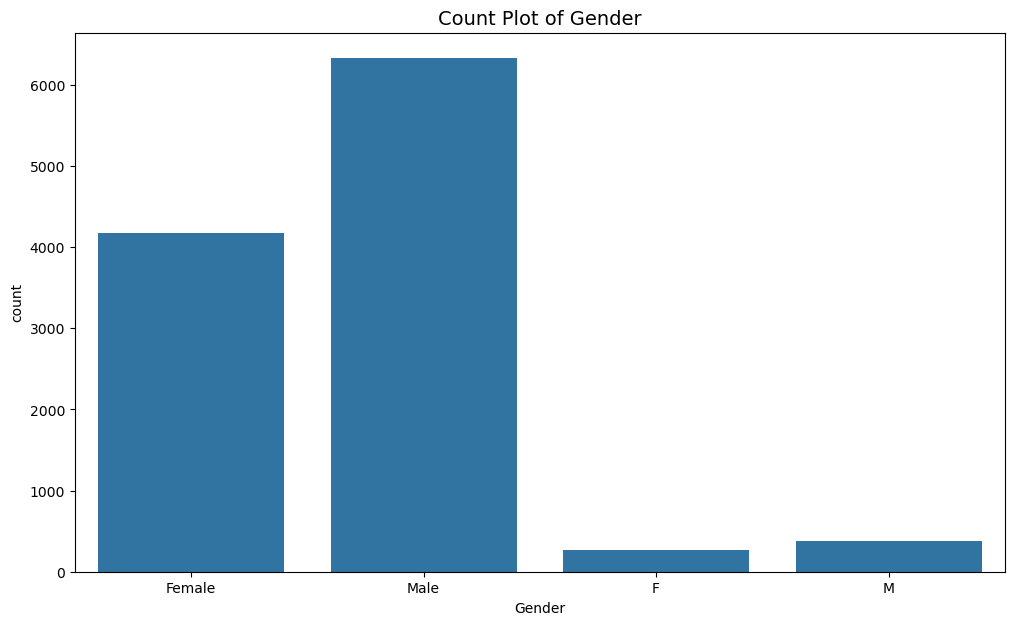

In [319]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Gender')
plt.title('Count Plot of Gender', fontsize=14)
plt.xlabel('Gender')
plt.show()

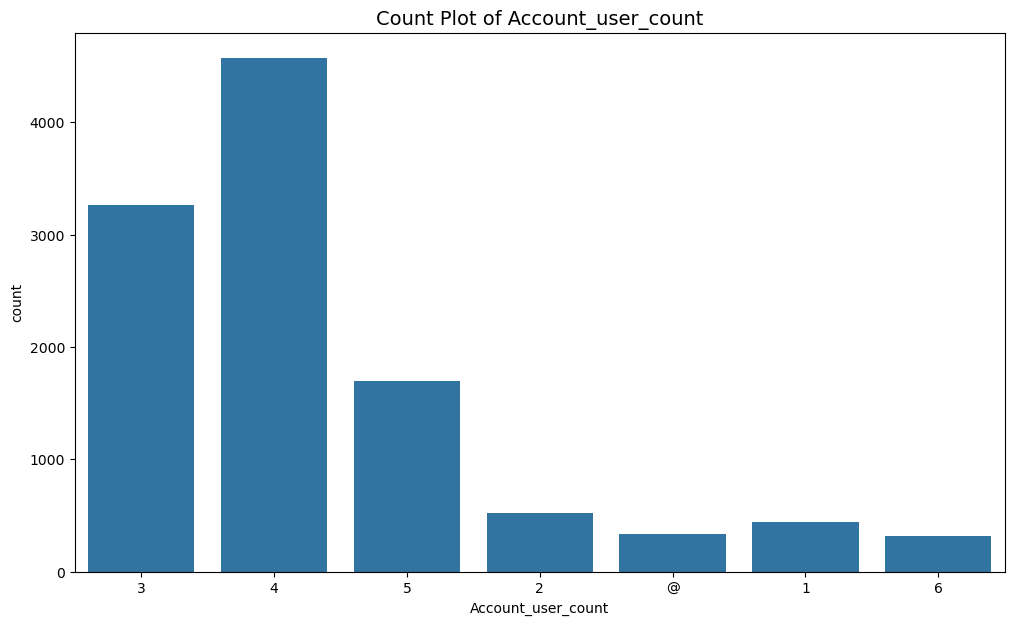

In [320]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Account_user_count')
plt.title('Count Plot of Account_user_count', fontsize=14)
plt.xlabel('Account_user_count')
plt.show()

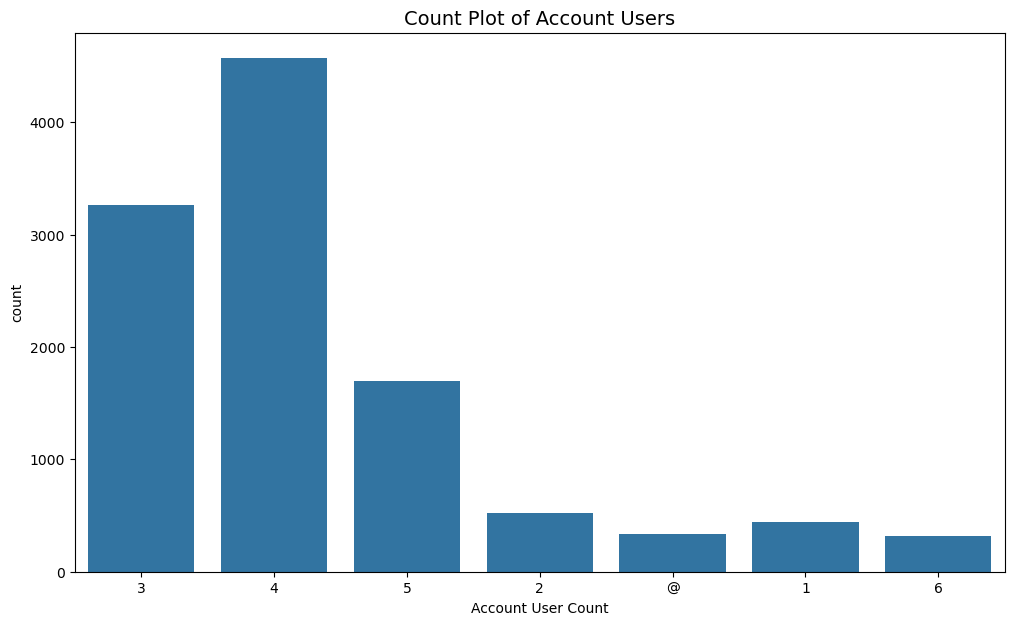

In [321]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Account_user_count')
plt.title('Count Plot of Account Users', fontsize=14)
plt.xlabel('Account User Count')
plt.show()

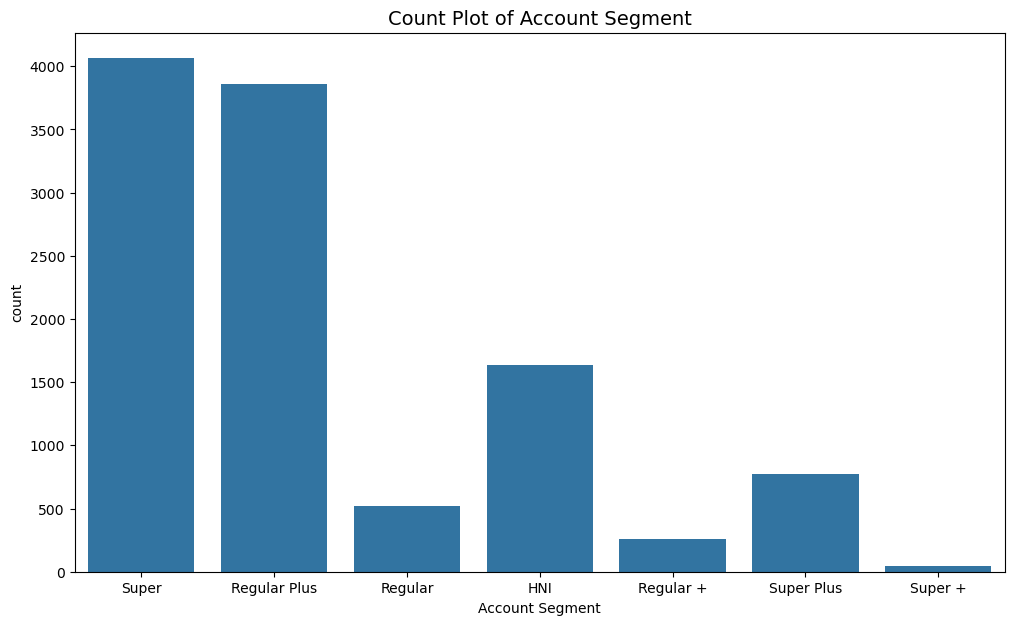

In [322]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'account_segment')
plt.title('Count Plot of Account Segment', fontsize=14)
plt.xlabel('Account Segment')
plt.show()

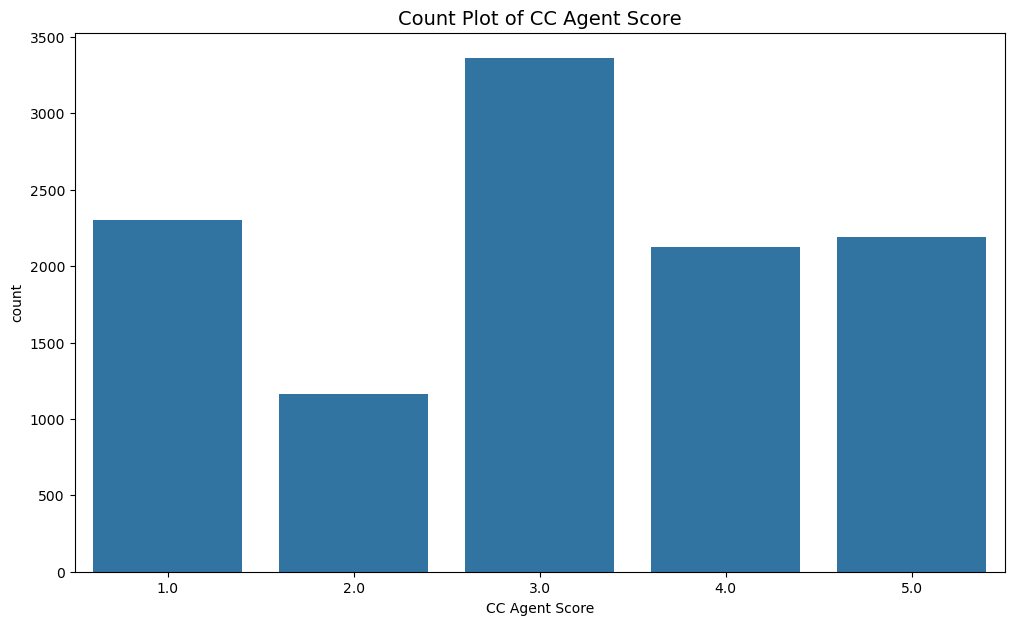

In [323]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'CC_Agent_Score')
plt.title('Count Plot of CC Agent Score', fontsize=14)
plt.xlabel('CC Agent Score')
plt.show()

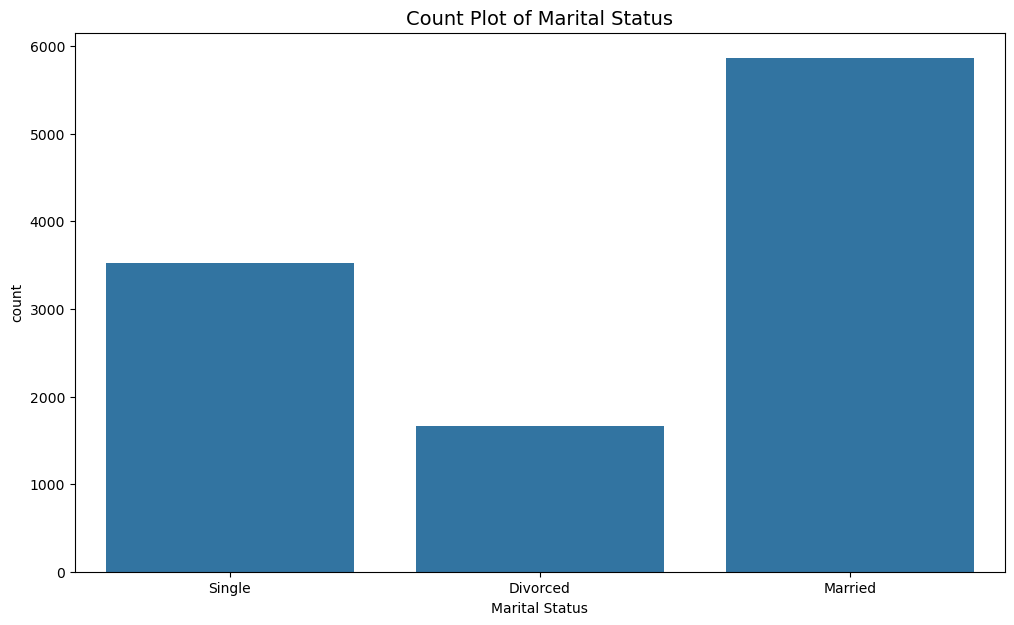

In [324]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Marital_Status')
plt.title('Count Plot of Marital Status', fontsize=14)
plt.xlabel('Marital Status')
plt.show()

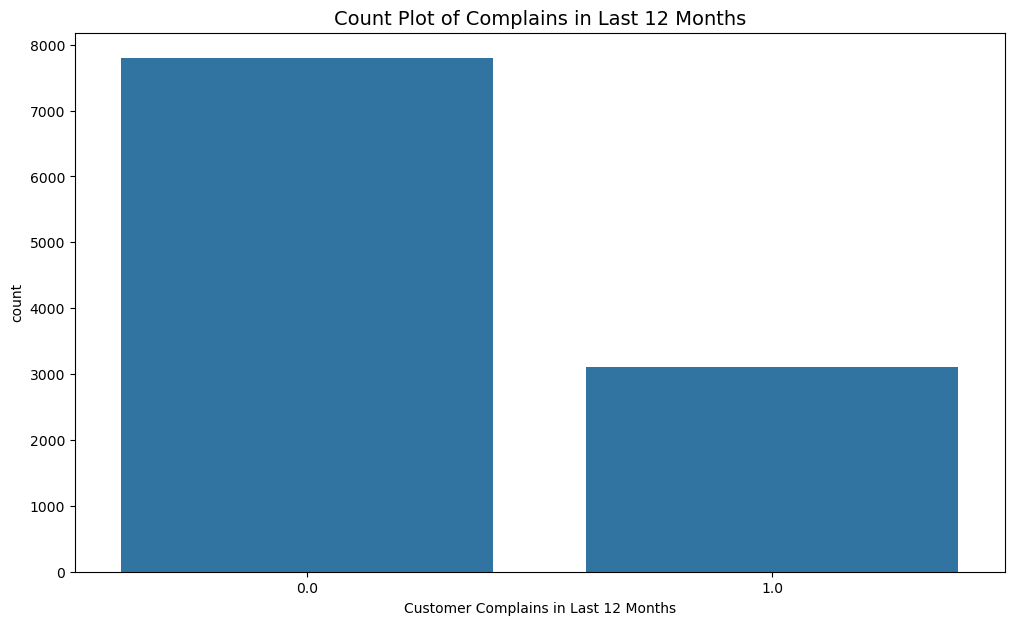

In [325]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Complain_ly')
plt.title('Count Plot of Complains in Last 12 Months', fontsize=14)
plt.xlabel('Customer Complains in Last 12 Months')
plt.show()

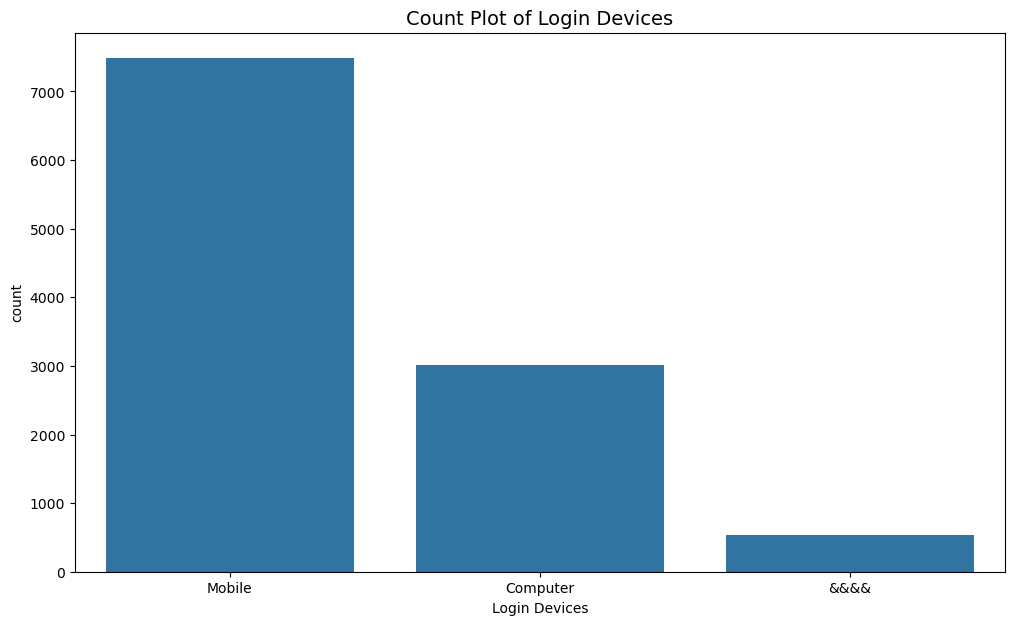

In [326]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Login_device')
plt.title('Count Plot of Login Devices', fontsize=14)
plt.xlabel('Login Devices')
plt.show()

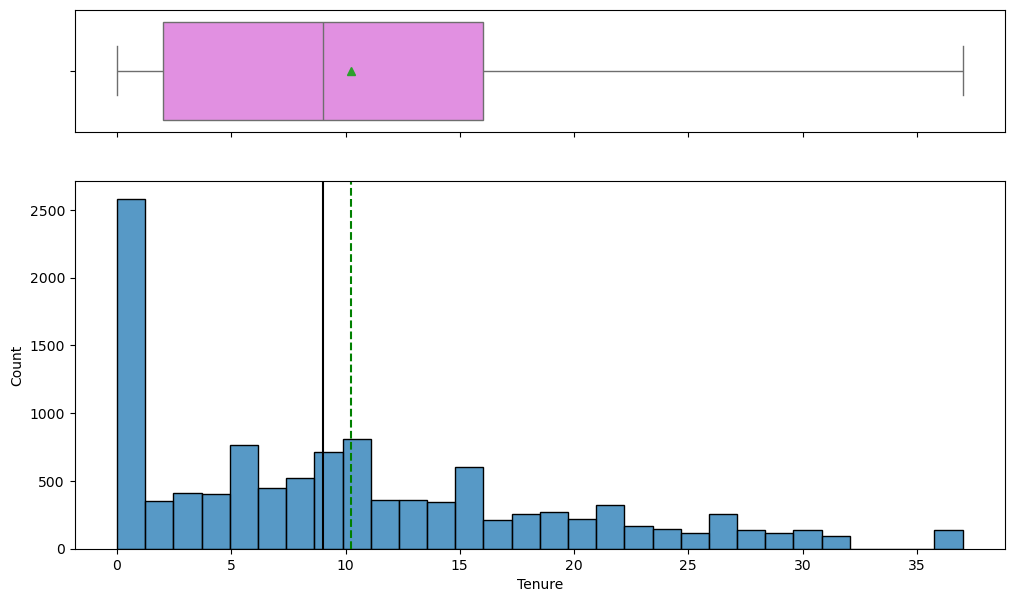

In [876]:
histogram_boxplot(df, 'Tenure')

## BIVARIATE ANALYSIS

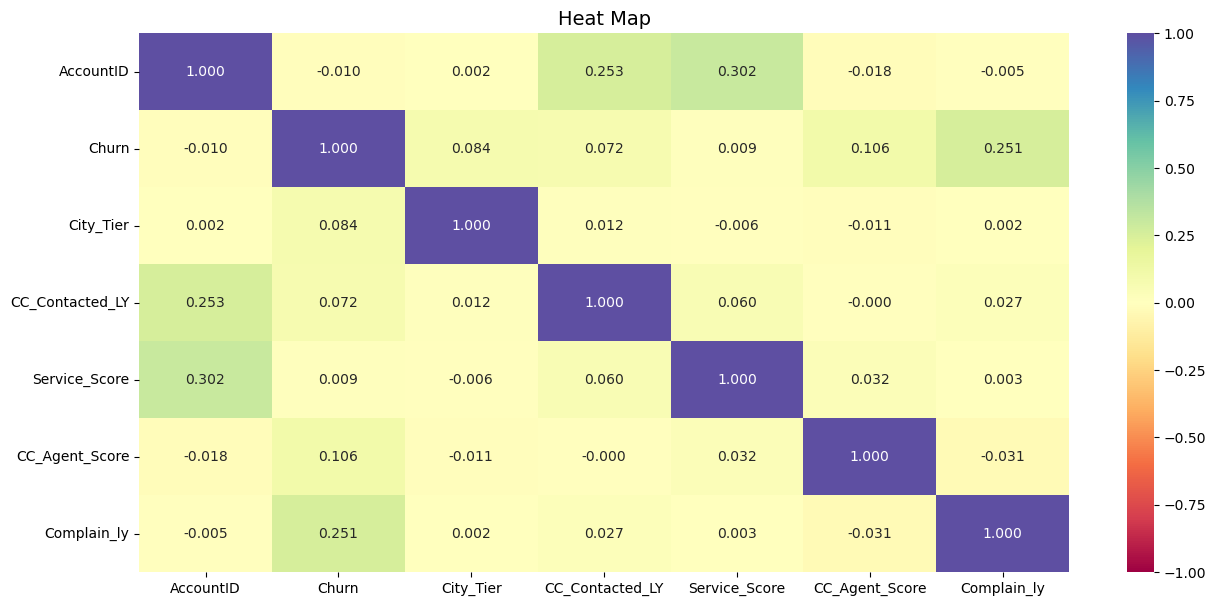

In [328]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="Spectral")
plt.title('Heat Map', fontsize=14)
plt.show()

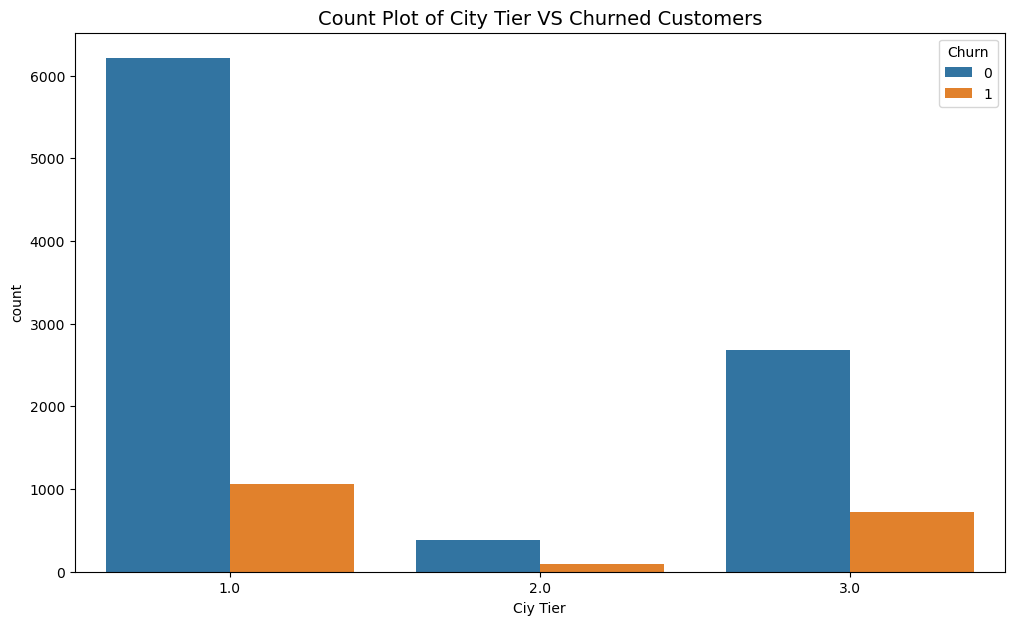

In [329]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'City_Tier',hue = 'Churn')
plt.title('Count Plot of City Tier VS Churned Customers', fontsize=14)
plt.xlabel('Ciy Tier')
plt.show()

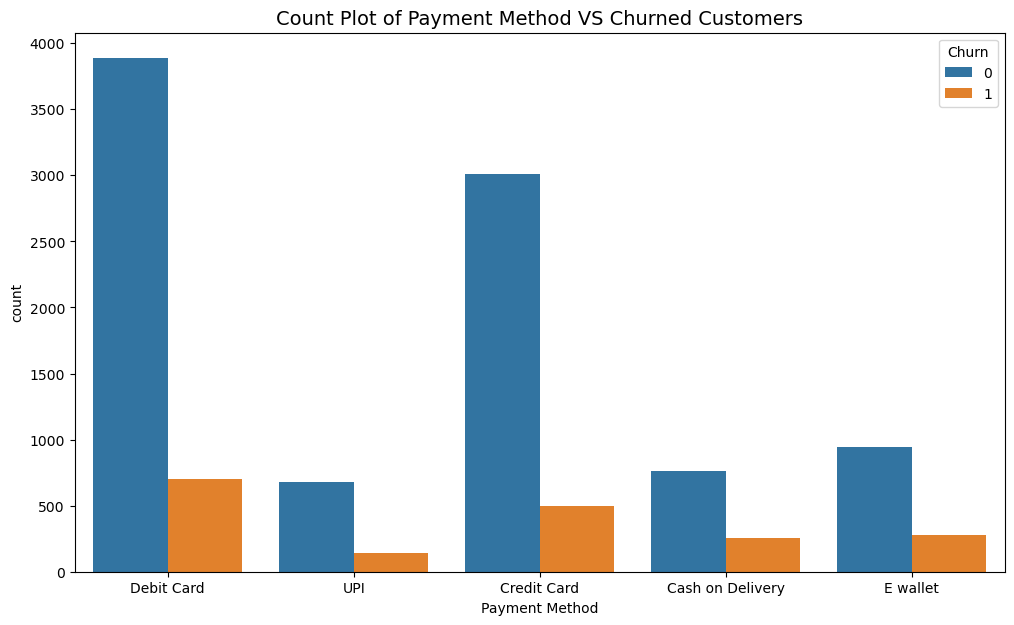

In [330]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Payment',hue = 'Churn')
plt.title('Count Plot of Payment Method VS Churned Customers', fontsize=14)
plt.xlabel('Payment Method')
plt.show()

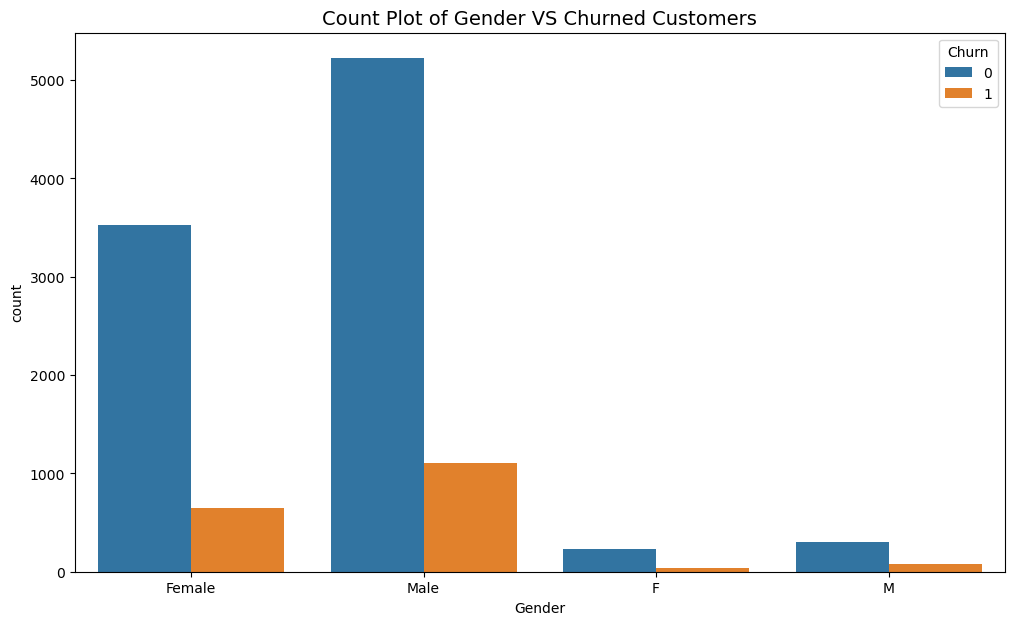

In [331]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Gender',hue = 'Churn')
plt.title('Count Plot of Gender VS Churned Customers', fontsize=14)
plt.xlabel('Gender')
plt.show()

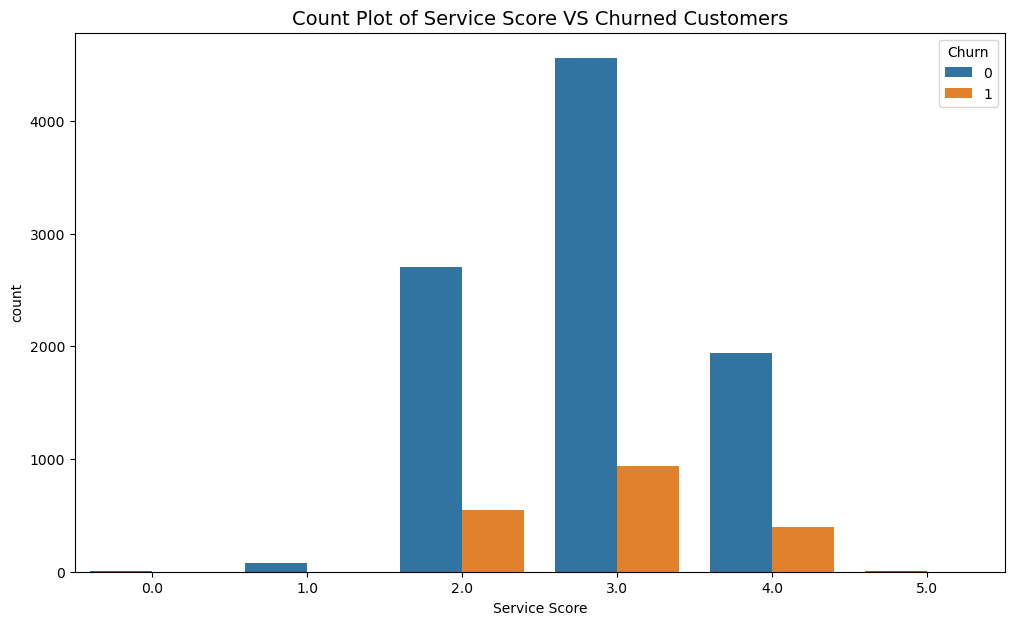

In [332]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Service_Score',hue = 'Churn')
plt.title('Count Plot of Service Score VS Churned Customers', fontsize=14)
plt.xlabel('Service Score')
plt.show()

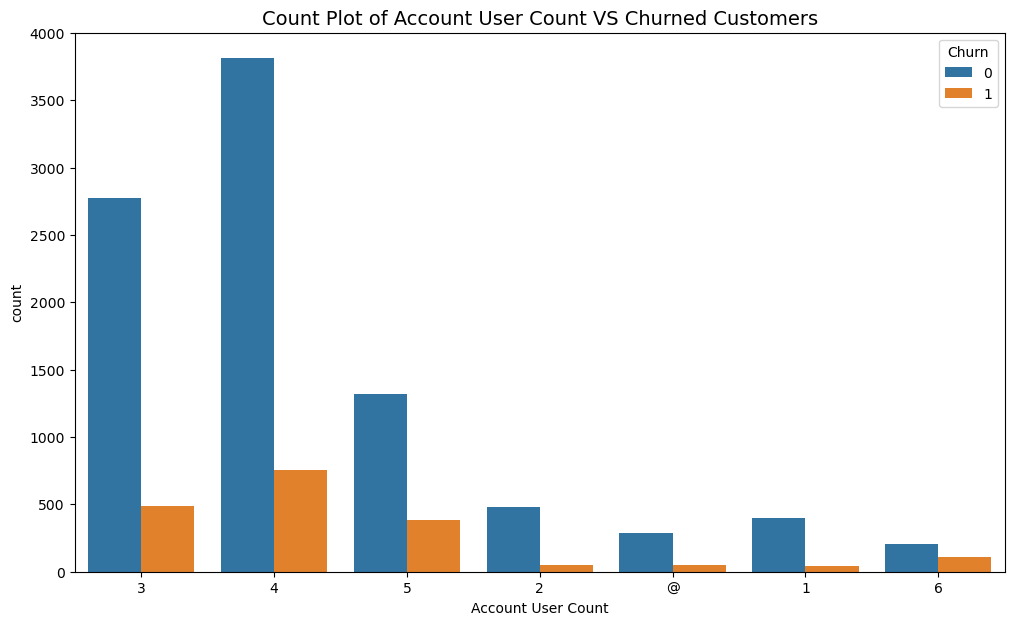

In [333]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Account_user_count',hue = 'Churn')
plt.title('Count Plot of Account User Count VS Churned Customers', fontsize=14)
plt.xlabel('Account User Count')
plt.show()

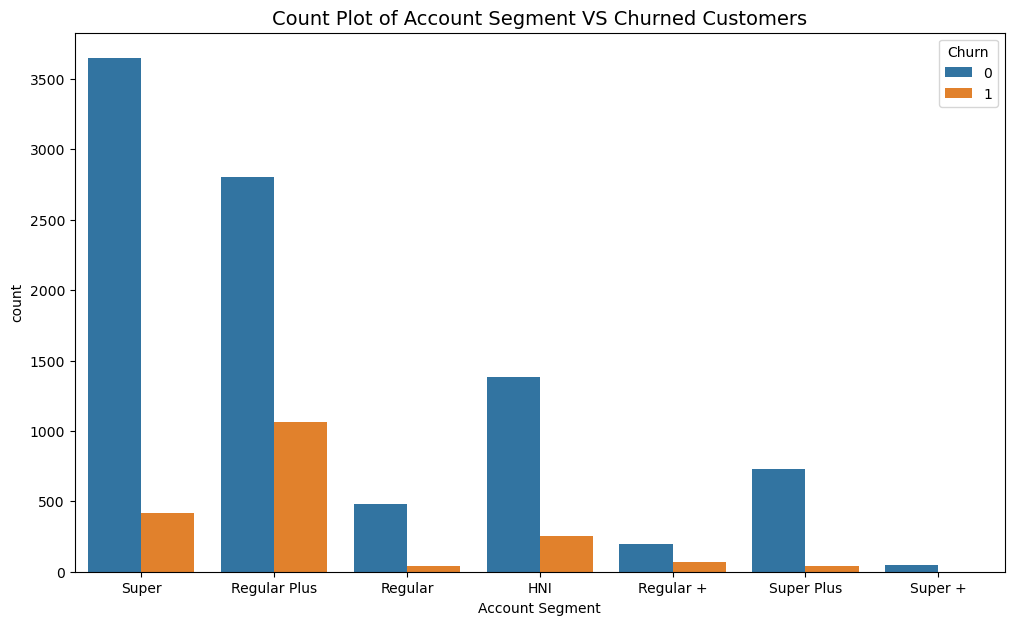

In [334]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'account_segment',hue = 'Churn')
plt.title('Count Plot of Account Segment VS Churned Customers', fontsize=14)
plt.xlabel('Account Segment')
plt.show()

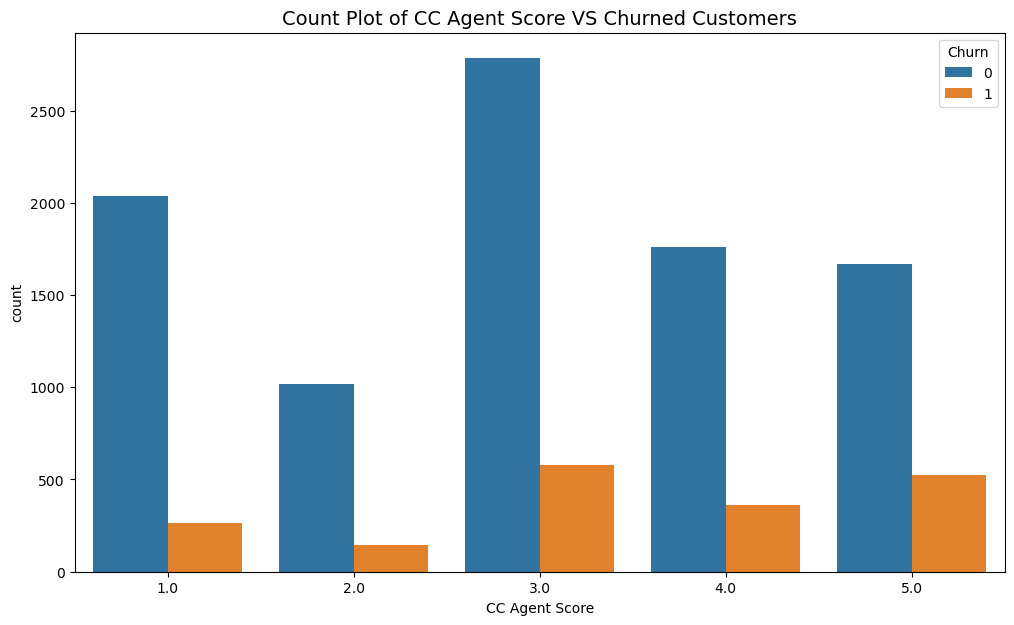

In [335]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'CC_Agent_Score',hue = 'Churn')
plt.title('Count Plot of CC Agent Score VS Churned Customers', fontsize=14)
plt.xlabel('CC Agent Score')
plt.show()

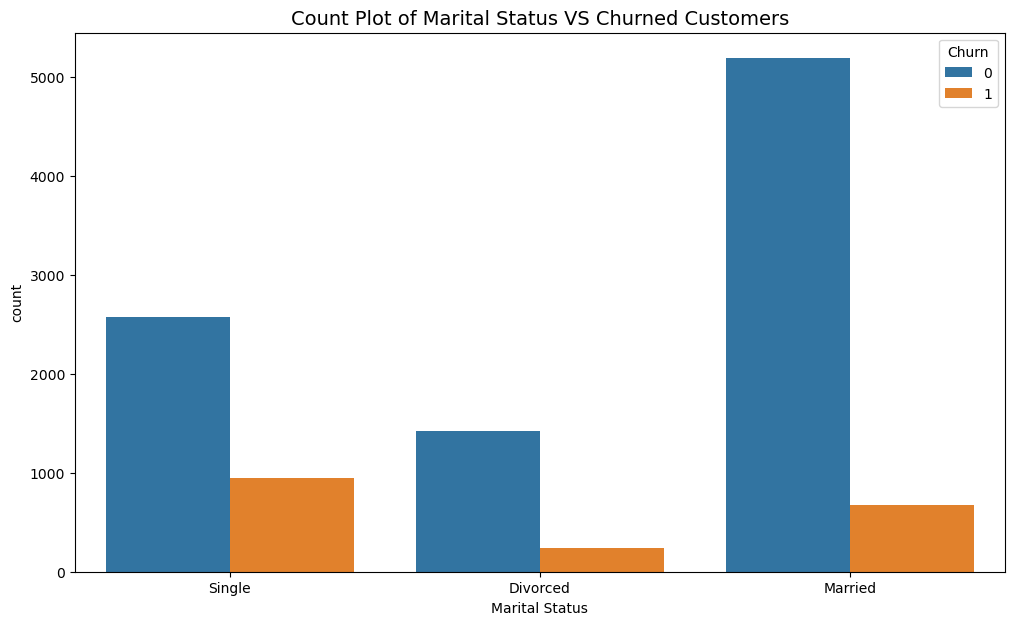

In [336]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Marital_Status',hue = 'Churn')
plt.title('Count Plot of Marital Status VS Churned Customers', fontsize=14)
plt.xlabel('Marital Status')
plt.show()

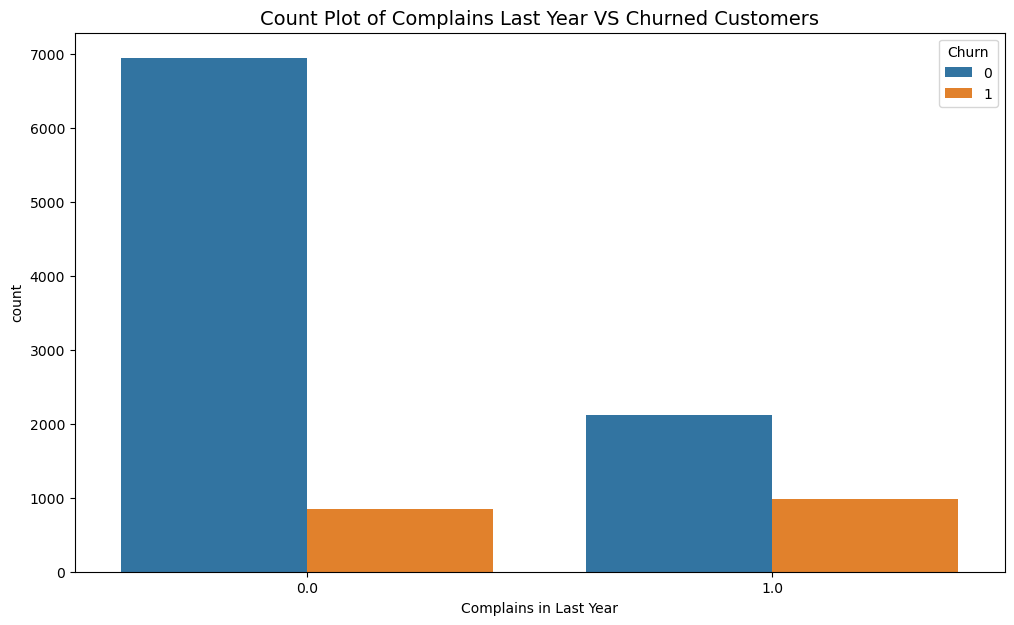

In [337]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Complain_ly',hue = 'Churn')
plt.title('Count Plot of Complains Last Year VS Churned Customers', fontsize=14)
plt.xlabel('Complains in Last Year')
plt.show()

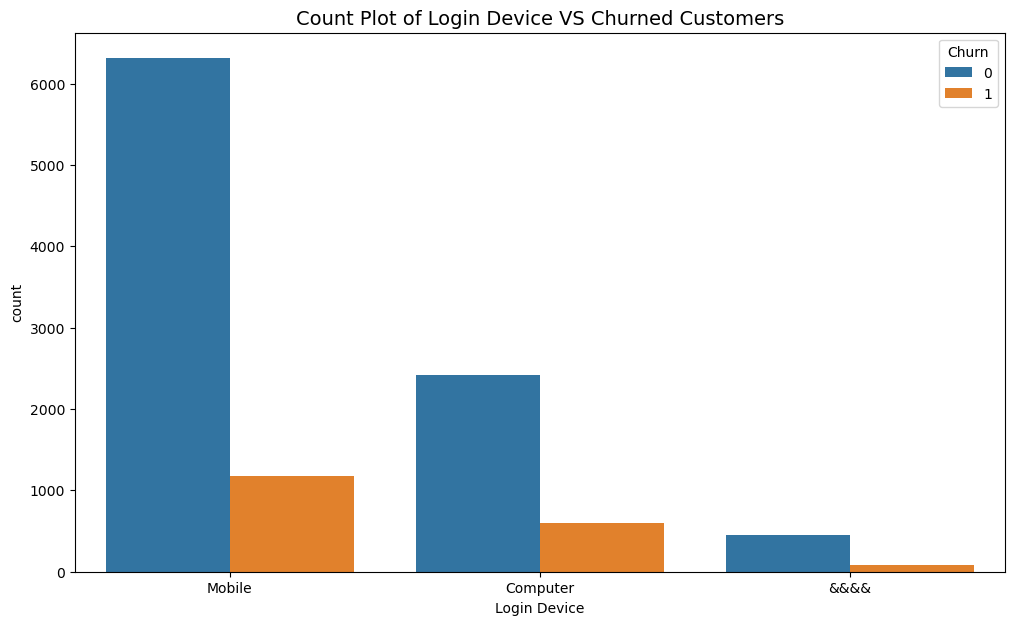

In [338]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df,x = 'Login_device',hue = 'Churn')
plt.title('Count Plot of Login Device VS Churned Customers', fontsize=14)
plt.xlabel('Login Device')
plt.show()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\511796075.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\511796075.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


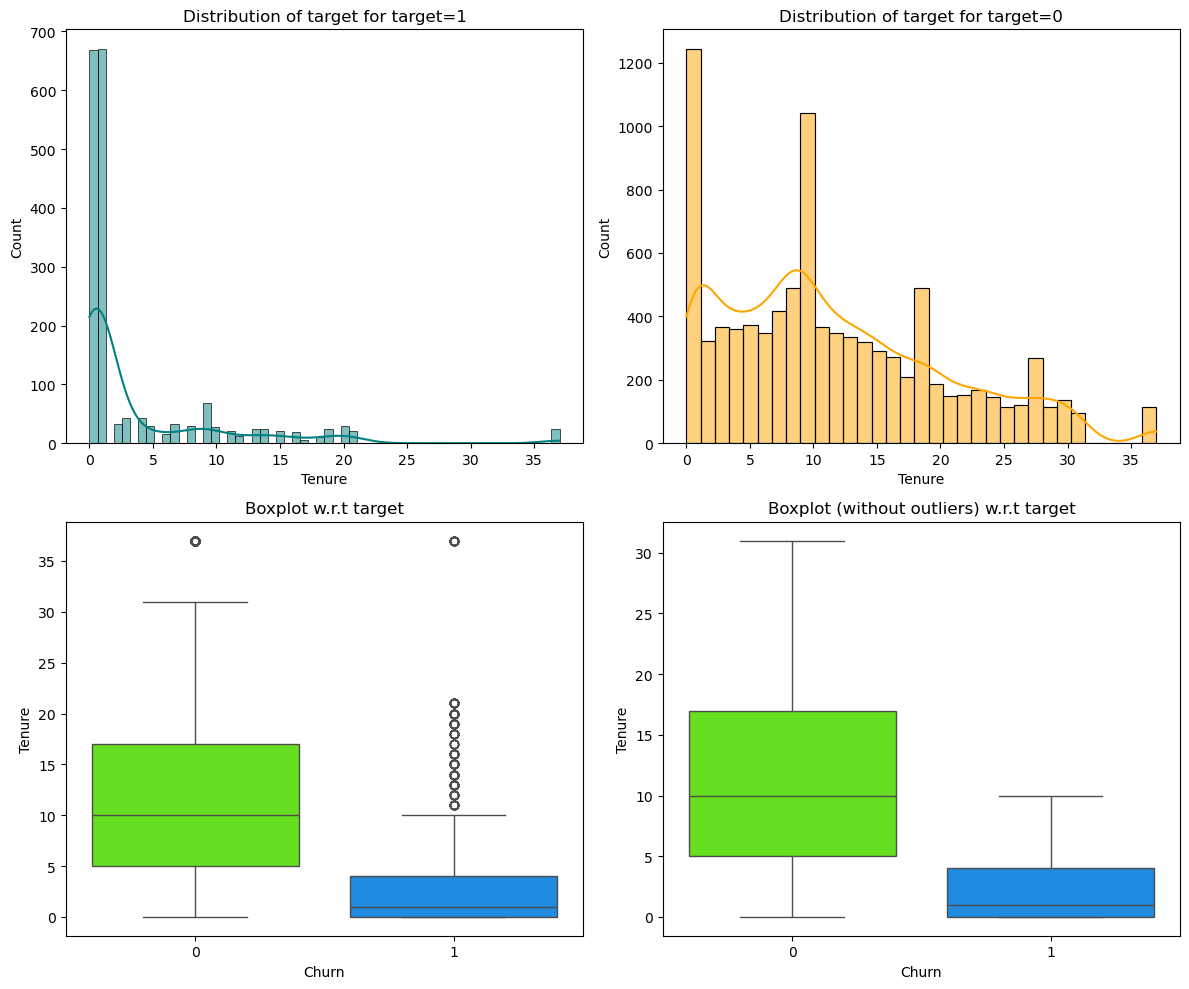

In [870]:
distribution_plot_wrt_target(df,'Tenure','Churn')

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\511796075.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\511796075.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


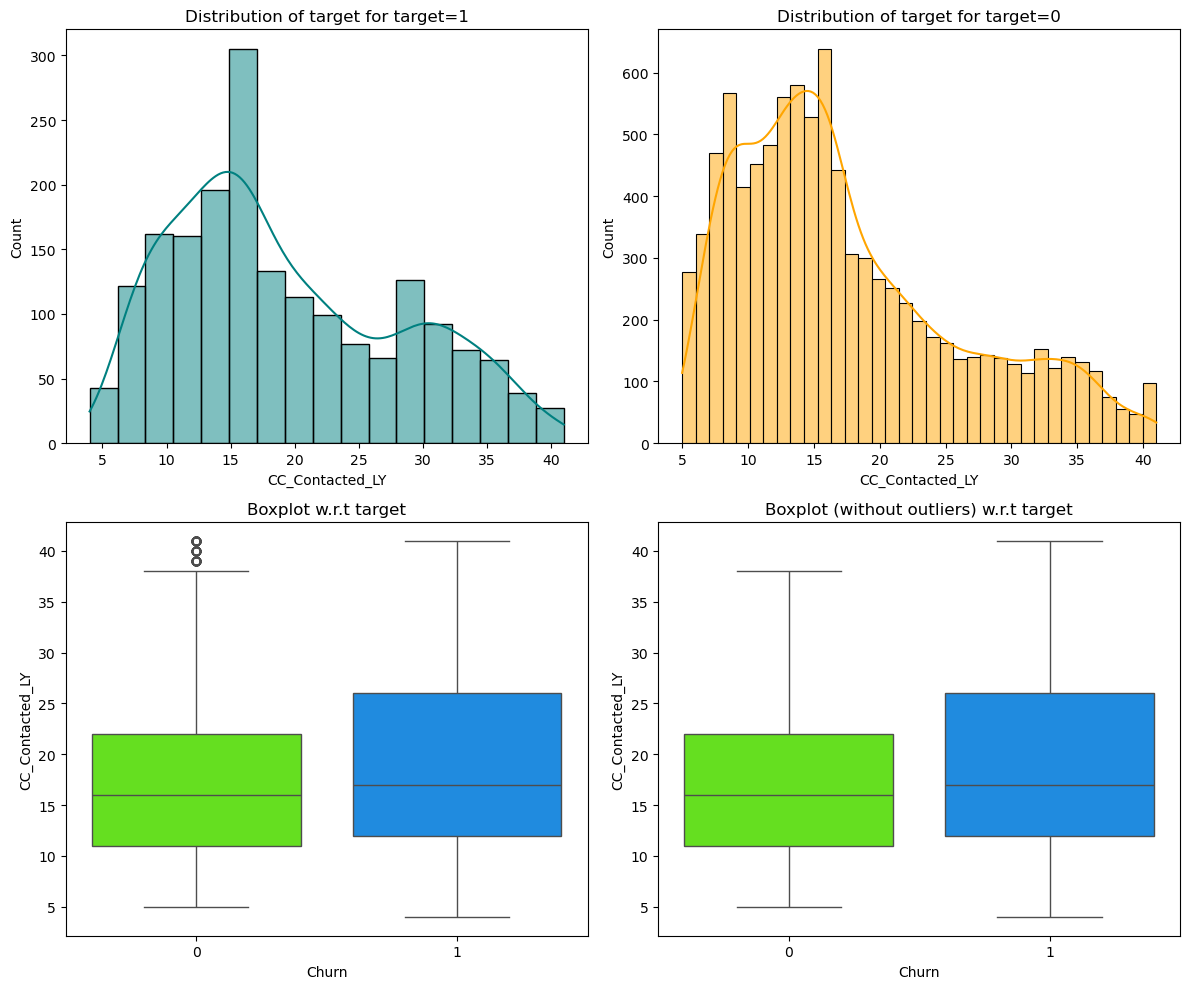

In [872]:
distribution_plot_wrt_target(df,'CC_Contacted_LY','Churn')

## REMOVAL OF UNWANTED VARIABLES

In [340]:
# Function to check all values in dataset
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
Tenure
61       2
50       2
51       2
60       2
31      96
29     114
25     114
#      116
26     122
99     131
27     131
30     137
28     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
4      403
5      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: count, dtype: int64


PAYMENT :  5
Payment
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: count, dtype: int64


GENDER :  4
Gender
F          270
M          376
Female    4178
Male      6328
Name: count, dtype: int64


ACCOUNT_USER_COUNT :  7
Account_user_count
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: count, dtype: int64


ACCOUNT_SEGMENT :  7
account_segment
Super +           47
Regular +        262
Regular          520
Super Plus  

In [341]:
# removing unwanted variables in Tenure
df['Tenure'] = df['Tenure'].replace('#',np.NaN)
df['Tenure'] = df['Tenure'].astype('Int64')
df["Tenure"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\1577291828.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tenure'] = df['Tenure'].replace('#',np.NaN)


<IntegerArray>
[   4,    0,    2,   13,   11, <NA>,    9,   99,   19,   20,   14,    8,   26,
   18,    5,   30,    7,    1,   23,    3,   29,    6,   28,   24,   25,   16,
   10,   15,   22,   27,   12,   21,   17,   50,   60,   31,   51,   61]
Length: 38, dtype: Int64

In [342]:
# replace null values with median
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [343]:
# removing unwanted variables in Gender
df['Gender'] = df['Gender'].replace('F','Female')
df['Gender'] = df['Gender'].replace('M','Male')

In [344]:
df["Gender"].unique()

array(['Female', 'Male', nan], dtype=object)

In [345]:
# removing unwanted variables in Account User Count
df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)
df['Account_user_count'] = df['Account_user_count'].astype('float64')

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\1153643558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Account_user_count'] = df['Account_user_count'].replace('@',np.NaN)


In [346]:
df["Account_user_count"].unique()

array([ 3.,  4., nan,  5.,  2.,  1.,  6.])

In [347]:
# removing unwanted variables in Rev Per Month
df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)
df['rev_per_month'] = df['rev_per_month'].astype('float64')
df["rev_per_month"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\335428168.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_per_month'] = df['rev_per_month'].replace('+',np.NaN)


array([  9.,   7.,   6.,   8.,   3.,   2.,   4.,  10.,   1.,   5.,  nan,
       130.,  19., 139., 102., 120., 138., 127., 123., 124., 116.,  21.,
       126., 134., 113., 114., 108., 140., 133., 129., 107., 118.,  11.,
       105.,  20., 119., 121., 137., 110.,  22., 101., 136., 125.,  14.,
        13.,  12., 115.,  23., 122., 117., 131., 104.,  15.,  25., 135.,
       111., 109., 100., 103.])

In [348]:
# removing unwanted variables in Rev Growth yoy'
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype('float64')
df["rev_growth_yoy"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\1349983468.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$',np.NaN)


array([11., 15., 14., 23., 22., 16., 12., 13., 17., 18., 24., 19., 20.,
       21., 25., 26., nan,  4., 27., 28.])

In [349]:
# removing unwanted variables in Coupon Used For Payment
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype('float64')
df["coupon_used_for_payment"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\3523376803.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*',np.NaN)


array([ 1.,  0.,  4.,  2.,  9.,  6., 11.,  7., 12., 10.,  5.,  3., 13.,
       15.,  8., nan, 14., 16.])

In [350]:
# removing unwanted variables in Day Since CC Connect
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype('float64')
df["Day_Since_CC_connect"].unique()

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\139674396.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$',np.NaN)


array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15., nan, 11., 10.,
        9., 13., 12., 17., 16., 14., 30., 46., 18., 31., 47.])

In [351]:
# removing unwanted variables in Cashback
df['cashback'] = df['cashback'].replace('$',np.NaN)
df['cashback'] = df['cashback'].astype('float64')
df["cashback"].unique

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\257291789.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cashback'] = df['cashback'].replace('$',np.NaN)


<bound method Series.unique of 0        159.93
1        120.90
2           NaN
3        134.07
4        129.60
          ...  
11255    153.71
11256    226.91
11257    191.42
11258    179.90
11259    175.04
Name: cashback, Length: 11260, dtype: float64>

In [352]:
# removing unwanted variables in Login Device
df['Login_device'] = df['Login_device'].replace('&&&&',np.NaN)
df["Login_device"].unique()

array(['Mobile', 'Computer', nan], dtype=object)

## MISSING VALUE TREATMENT

In [354]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                       0
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [355]:
# treatment in City Tier
df['City_Tier'] = df['City_Tier'].fillna(df['City_Tier'].mode()[0])

In [356]:
# treatment in CC_Contacted_LY
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median())

In [357]:
# treatment in Payment
df['Payment'] = df['Payment'].fillna(df['Payment'].mode()[0])

In [358]:
# treatment in Gender
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [359]:
# treatment in Service_Score
df['Service_Score'] = df['Service_Score'].fillna(df['Service_Score'].mode()[0])

In [360]:
# treatment in Account_user_count
df['Account_user_count'] = df['Account_user_count'].fillna(df['Account_user_count'].median())

In [361]:
# treatment in account_segment
df['account_segment'] = df['account_segment'].fillna(df['account_segment'].mode()[0])

In [362]:
# treatment in CC_Agent_Score
df['CC_Agent_Score'] = df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].mode()[0])

In [363]:
# treatment in Marital_Status
df['Marital_Status'] = df['Marital_Status'].fillna(df['Marital_Status'].mode()[0])

In [364]:
# treatment in rev_per_month 
df['rev_per_month'] = df['rev_per_month'].fillna(df['rev_per_month'].median())

In [365]:
# treatment in Complain_ly
df['Complain_ly'] = df['Complain_ly'].fillna(df['Complain_ly'].mode()[0])

In [366]:
# treatment in rev_growth_yoy 
df['rev_growth_yoy'] = df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median())

In [367]:
# treatment in coupon_used_for_payment
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median())

In [368]:
# treatment in Day_Since_CC_connect
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median())

In [369]:
# treatment in cashback
df['cashback'] = df['cashback'].fillna(df['cashback'].median())

In [370]:
# treatment in Login_device
df['Login_device'] = df['Login_device'].fillna(df['Login_device'].mode()[0])

In [371]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

## OUTLIER TREATMENT

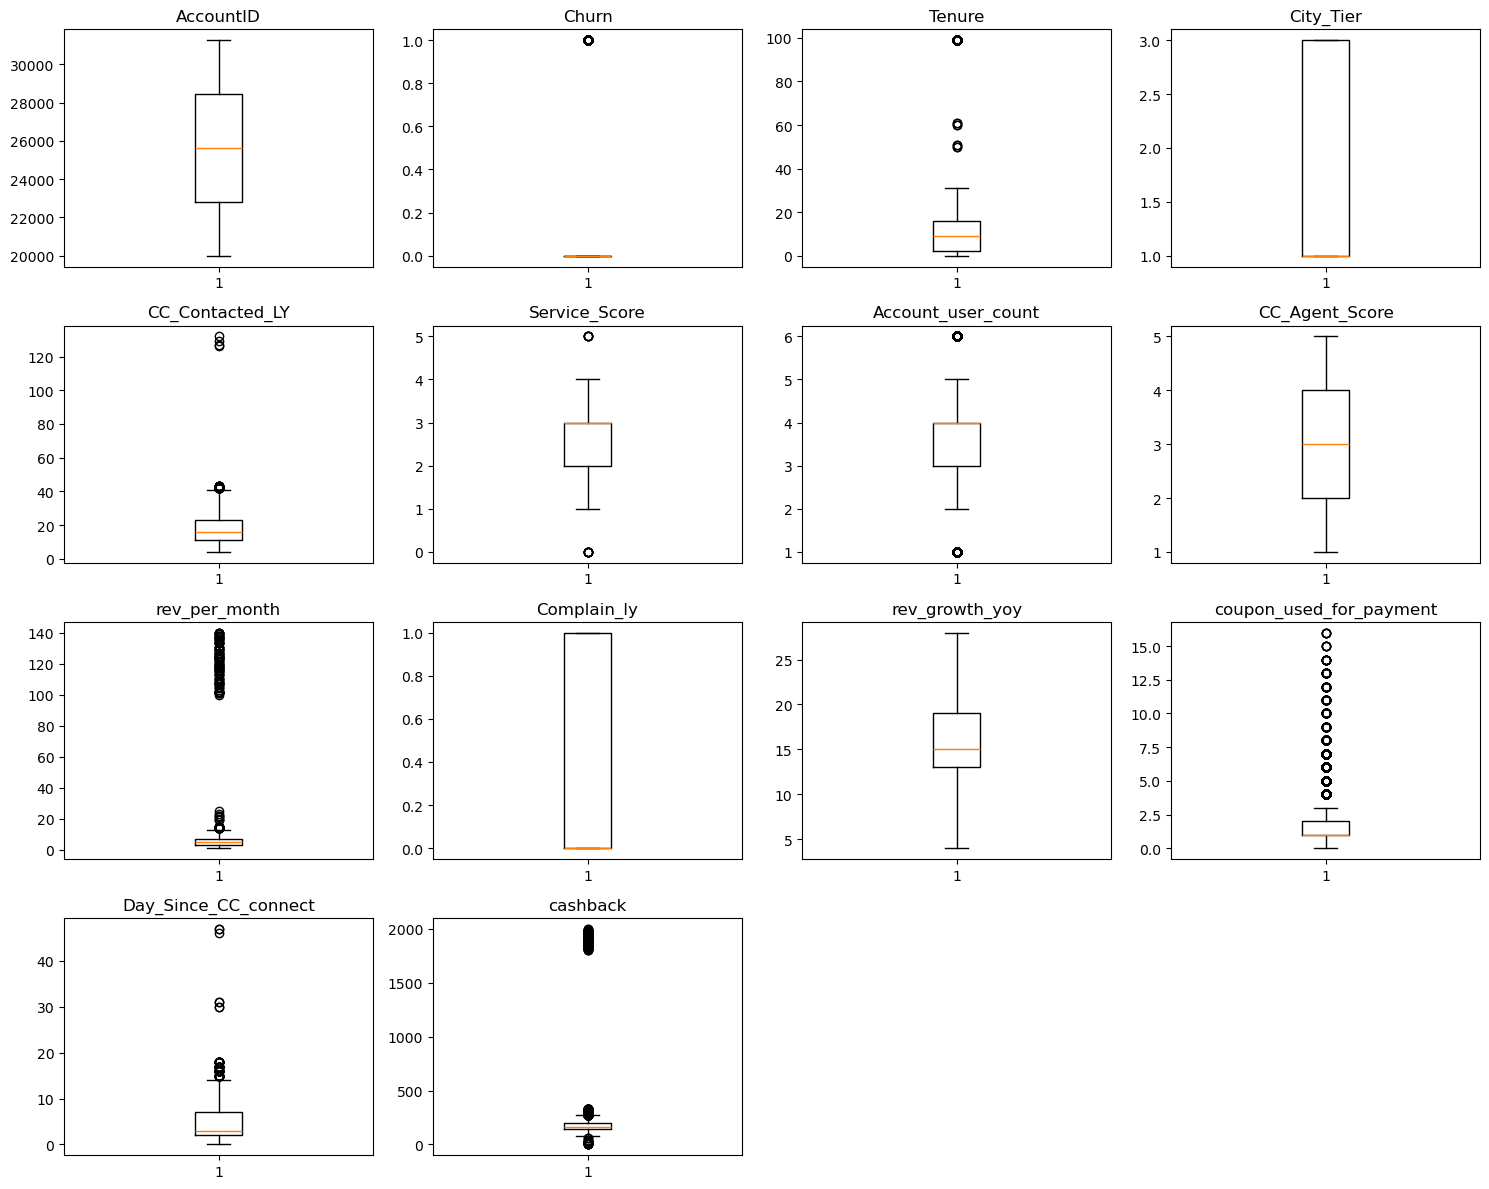

In [373]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [374]:
# treating outliers
def outlier_treatment(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [375]:
# List of columns to apply the outlier treatment
columns_to_process = [
    'Tenure', 'CC_Contacted_LY', 'Account_user_count', 'cashback', 'rev_per_month', 
    'Day_Since_CC_connect', 'coupon_used_for_payment', 'rev_growth_yoy'
]

for col in columns_to_process:
    lw, up = outlier_treatment(df[col])
    df[col] = np.clip(df[col], lw, up)

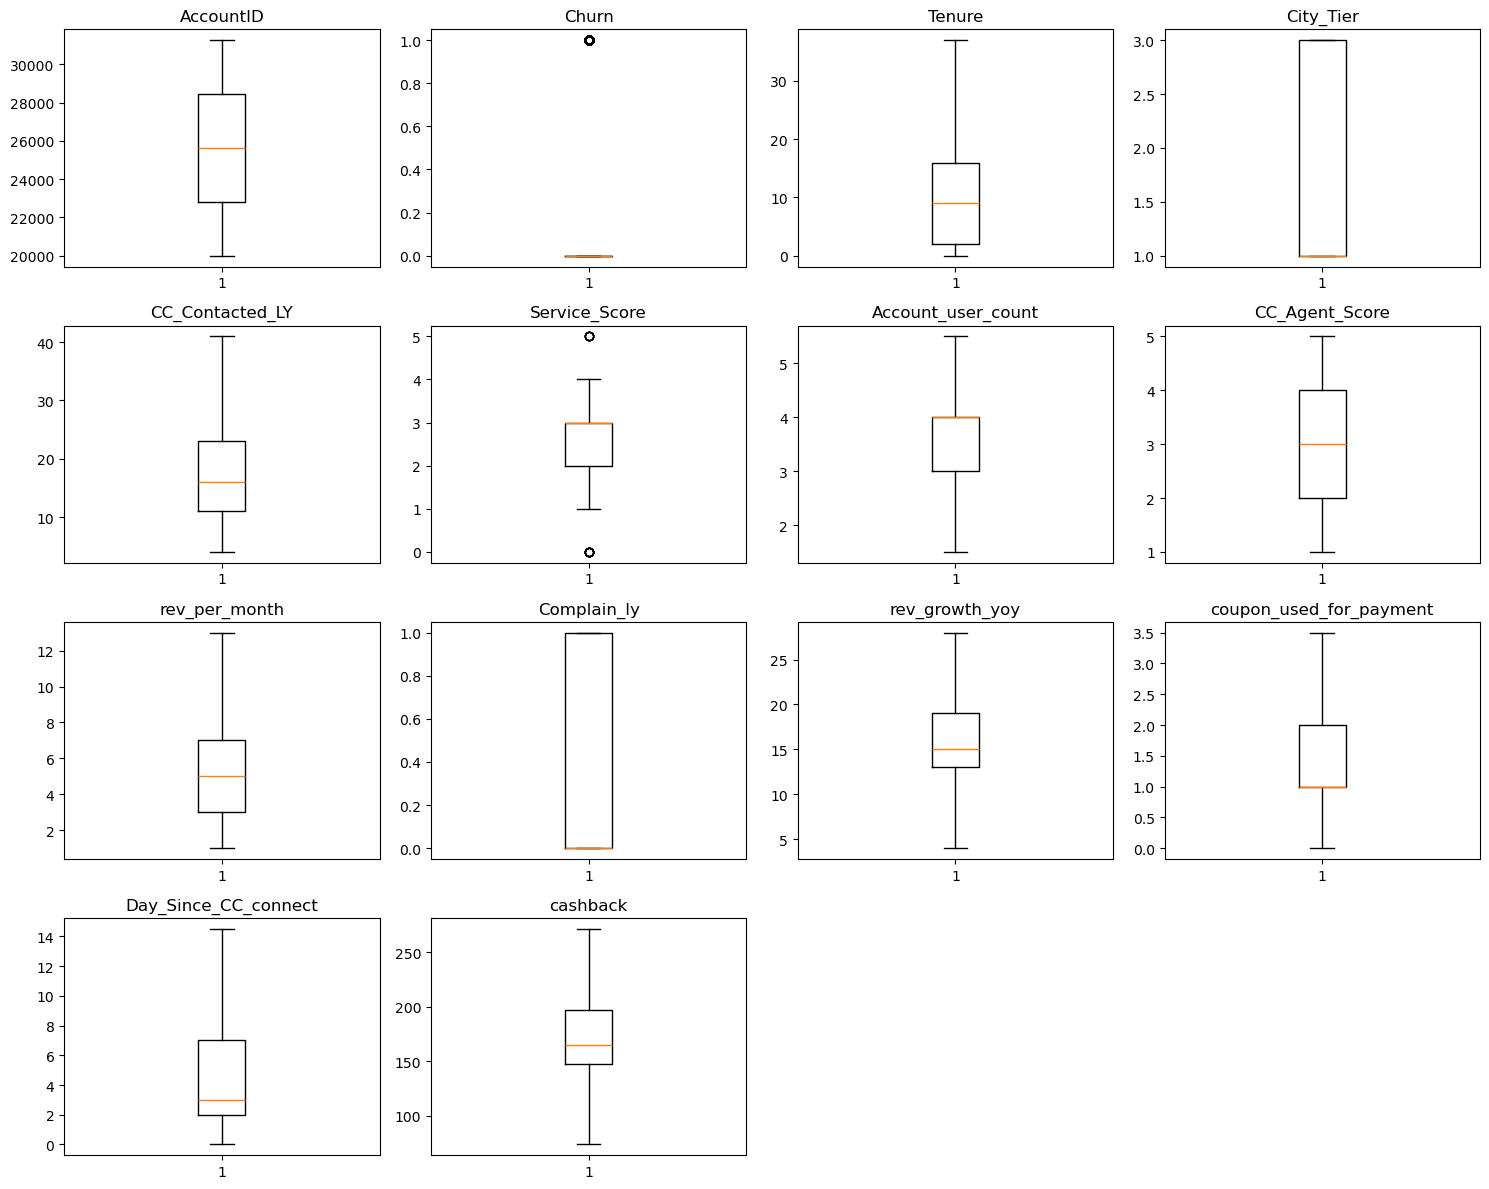

In [376]:
# check outliers post treatment
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## VARIABLE TRANSFORMATION

In [378]:
# encoding payment variable
payment_mapping = {
    'Debit Card': 1,
    'UPI': 2,
    'Credit Card': 3,
    'Cash on Delivery': 4,
    'E wallet': 5
}

df['Payment'] = df['Payment'].replace(payment_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\357238523.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Payment'] = df['Payment'].replace(payment_mapping)


In [379]:
# encoding gender variable
gender_mapping = {
    'Female': 1, 'F': 1,
    'Male': 2, 'M': 2
}

df['Gender'] = df['Gender'].replace(gender_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\3322179126.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


In [380]:
# encoding account segment variable
account_segment_mapping = {
    'Super': 1,
    'Regular Plus': 2, 'Regular +': 2,
    'Regular': 3,
    'HNI': 4,
    'Super Plus': 5, 'Super +': 5
}

df['account_segment'] = df['account_segment'].replace(account_segment_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\1112756489.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['account_segment'] = df['account_segment'].replace(account_segment_mapping)


In [381]:
# encoding marital status variable
marital_status_mapping = {
    'Single': 1,
    'Divorced': 2,
    'Married': 3
}

df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\2153673498.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Marital_Status'] = df['Marital_Status'].replace(marital_status_mapping)


In [382]:
# encoding login device variable
login_device_mapping = {
    'Mobile': 1,
    'Computer': 2
}

df['Login_device'] = df['Login_device'].replace(login_device_mapping)

C:\Users\Ishaan Shakti\AppData\Local\Temp\ipykernel_19468\1616452952.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Login_device'] = df['Login_device'].replace(login_device_mapping)


In [383]:
df = df.drop(['AccountID'], axis=1)

## MODEL BUILDING

In [385]:
# Create X and Y for modeling
X = df.drop(['Churn'], axis=1) 
y = df['Churn']

In [386]:
# Splitting data into train and test data set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [387]:
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7882 entries, 7580 to 235
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Tenure                   7882 non-null   int32
 1   City_Tier                7882 non-null   int32
 2   CC_Contacted_LY          7882 non-null   int32
 3   Payment                  7882 non-null   int32
 4   Gender                   7882 non-null   int32
 5   Service_Score            7882 non-null   int32
 6   Account_user_count       7882 non-null   int32
 7   account_segment          7882 non-null   int32
 8   CC_Agent_Score           7882 non-null   int32
 9   Marital_Status           7882 non-null   int32
 10  rev_per_month            7882 non-null   int32
 11  Complain_ly              7882 non-null   int32
 12  rev_growth_yoy           7882 non-null   int32
 13  coupon_used_for_payment  7882 non-null   int32
 14  Day_Since_CC_connect     7882 non-null   int32
 15  cashbac

## SMOTE

In [389]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

## DATA SCALING

In [391]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Apply scaling
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

## VIF

In [393]:
#Checking for multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
vif = pd.DataFrame()
vif["Feature"] = X_train_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
              for i in range(X_train_scaled_df.shape[1])]

print(vif)

                    Feature        VIF
0                    Tenure   2.308725
1                 City_Tier   1.775344
2           CC_Contacted_LY   3.397405
3                   Payment   2.312089
4                    Gender   2.230189
5             Service_Score  18.764917
6        Account_user_count  10.498839
7           account_segment   3.012585
8            CC_Agent_Score   3.351875
9            Marital_Status   2.395316
10            rev_per_month   3.470553
11              Complain_ly   1.427734
12           rev_growth_yoy   9.615602
13  coupon_used_for_payment   3.750845
14     Day_Since_CC_connect   3.295465
15                 cashback  13.307189
16             Login_device   1.292532


In [475]:
X_train_scaled_df = X_train_scaled_df.drop(['Service_Score'], axis=1) 
vif = pd.DataFrame()
vif["Feature"] = X_train_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
              for i in range(X_train_scaled_df.shape[1])]

print(vif)

                    Feature        VIF
0                    Tenure   2.308724
1                 City_Tier   1.775339
2           CC_Contacted_LY   3.341550
3                   Payment   2.309774
4                    Gender   2.218024
5        Account_user_count   8.490500
6           account_segment   2.979889
7            CC_Agent_Score   3.218857
8            Marital_Status   2.369413
9             rev_per_month   3.411975
10              Complain_ly   1.421152
11           rev_growth_yoy   8.487744
12  coupon_used_for_payment   3.632926
13     Day_Since_CC_connect   3.295055
14                 cashback  12.888429
15             Login_device   1.288982


In [479]:
X_train_scaled_df = X_train_scaled_df.drop(['cashback'], axis=1) 
vif = pd.DataFrame()
vif["Feature"] = X_train_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
              for i in range(X_train_scaled_df.shape[1])]

print(vif)

                    Feature       VIF
0                    Tenure  2.154953
1                 City_Tier  1.710788
2           CC_Contacted_LY  3.313977
3                   Payment  2.308791
4                    Gender  2.206440
5        Account_user_count  7.964640
6           account_segment  2.177226
7            CC_Agent_Score  3.204946
8            Marital_Status  2.357754
9             rev_per_month  3.305721
10              Complain_ly  1.420510
11           rev_growth_yoy  8.415728
12  coupon_used_for_payment  3.555347
13     Day_Since_CC_connect  3.056193
14             Login_device  1.288022


In [481]:
X_train_scaled_df = X_train_scaled_df.drop(['rev_growth_yoy'], axis=1) 
vif = pd.DataFrame()
vif["Feature"] = X_train_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
              for i in range(X_train_scaled_df.shape[1])]

print(vif)

                    Feature       VIF
0                    Tenure  2.150991
1                 City_Tier  1.709123
2           CC_Contacted_LY  3.089069
3                   Payment  2.303336
4                    Gender  2.169695
5        Account_user_count  6.594439
6           account_segment  2.174526
7            CC_Agent_Score  3.054643
8            Marital_Status  2.343013
9             rev_per_month  3.263264
10              Complain_ly  1.399364
11  coupon_used_for_payment  3.544008
12     Day_Since_CC_connect  3.050545
13             Login_device  1.280383


In [489]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

drop_cols = ['Service_Score', 'cashback', 'rev_growth_yoy']
X_train_final = X_train_scaled_df.drop(drop_cols, axis=1)
X_test_final = X_test_scaled_df.drop(drop_cols, axis=1)

In [483]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [485]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## LOGISTIC REGRESSION MODEL

In [498]:
# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lg_model = LogisticRegression(random_state=1, max_iter=1000)
lg_model.fit(X_train_final, y_train_smote)

LogisticRegression(max_iter=1000, random_state=1)

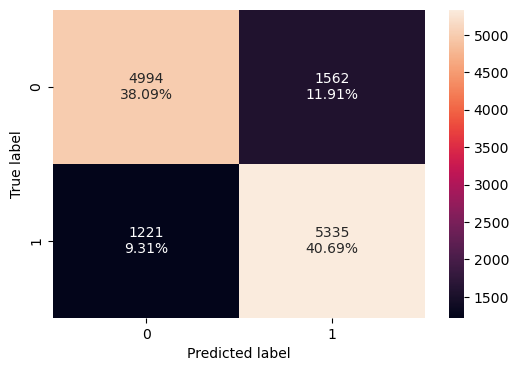

In [500]:
confusion_matrix_statsmodels(lg_model, X_train_final, y_train_smote)

In [502]:
print("Training performance model 1:")
logistic_reg_perf_train = model_performance_classification_statsmodels(lg_model, X_train_final, y_train_smote)
logistic_reg_perf_train

Training performance model 1:


,Accuracy,Recall,Precision,F1
0,0.787752,0.813758,0.773525,0.793132


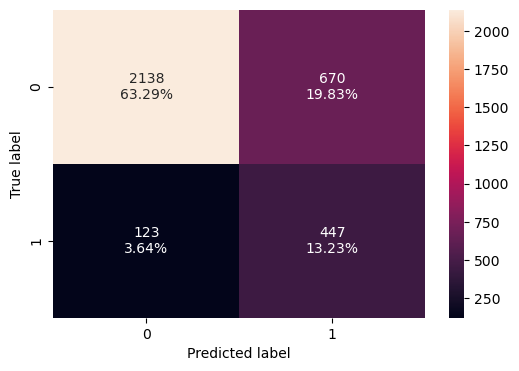

In [504]:
confusion_matrix_statsmodels(lg_model, X_test_final, y_test)

In [506]:
print("Testing performance model 1:")
logistic_reg_perf_test=model_performance_classification_statsmodels(lg_model, X_test_final, y_test)
logistic_reg_perf_test

Testing performance model 1:


,Accuracy,Recall,Precision,F1
0,0.765246,0.784211,0.400179,0.529935


<Figure size 800x600 with 0 Axes>

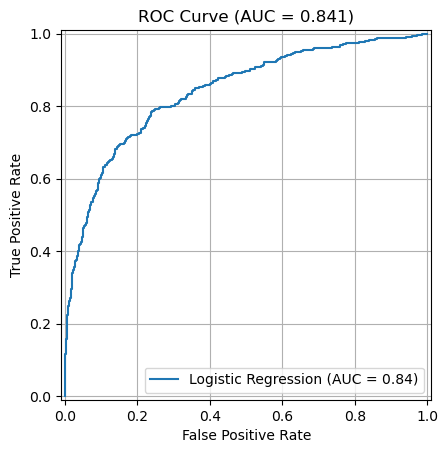

In [519]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get probability estimates for the positive class
y_proba = lg_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## DECISION TREE MODEL

In [509]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(X_train_final, y_train_smote)

DecisionTreeClassifier(random_state=1)

In [511]:
decision_tree_perf_train = model_performance_classification_statsmodels(
    dt_model, X_train_final, y_train_smote
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.999847,0.999847,0.999847,0.999847


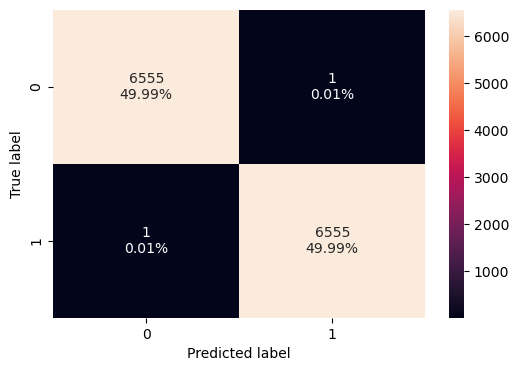

In [513]:
confusion_matrix_statsmodels(dt_model, X_train_final, y_train_smote)

In [515]:
decision_tree_perf_test = model_performance_classification_statsmodels(
    dt_model, X_test_final, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.905861,0.866667,0.671196,0.756508


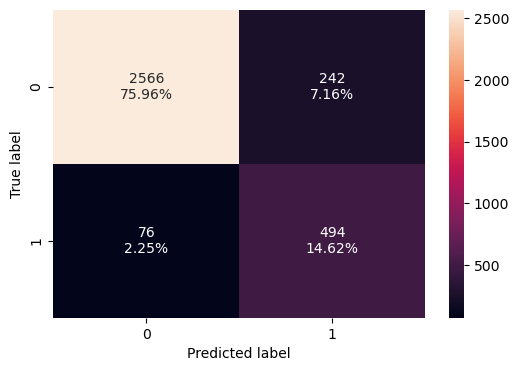

In [517]:
confusion_matrix_statsmodels(dt_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

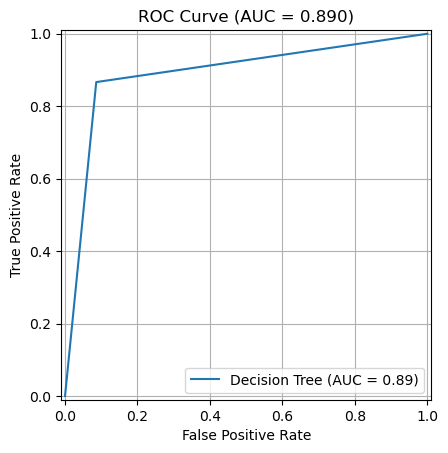

In [521]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Get probability estimates for the positive class
y_proba = dt_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## LINEAR DISCRIMINANT ANALYSIS MODEL

In [524]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model = lda_model.fit(X_train_final, y_train_smote)

In [526]:
linear_discriminant_perf_train = model_performance_classification_statsmodels(
    lda_model, X_train_final, y_train_smote
)
linear_discriminant_perf_train

,Accuracy,Recall,Precision,F1
0,0.783023,0.82352,0.761817,0.791468


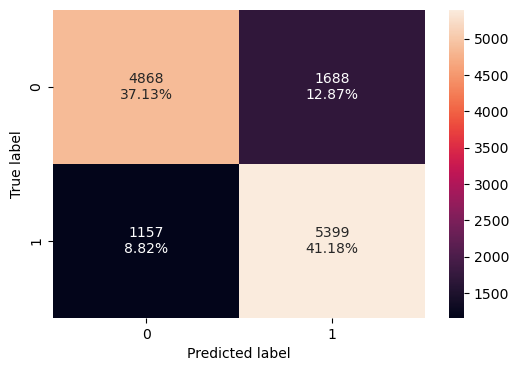

In [528]:
confusion_matrix_statsmodels(lda_model, X_train_final, y_train_smote)

In [530]:
linear_discriminant_perf_test = model_performance_classification_statsmodels(
    lda_model, X_test_final, y_test
)
linear_discriminant_perf_test

,Accuracy,Recall,Precision,F1
0,0.745115,0.787719,0.377628,0.510517


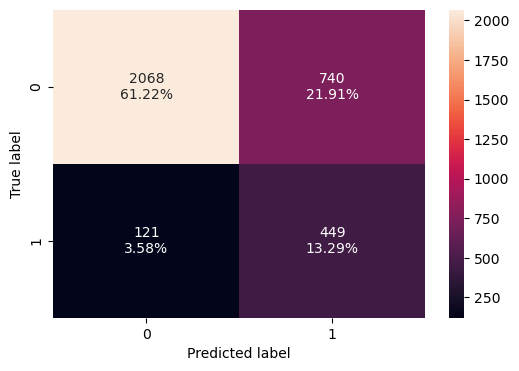

In [532]:
confusion_matrix_statsmodels(lda_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

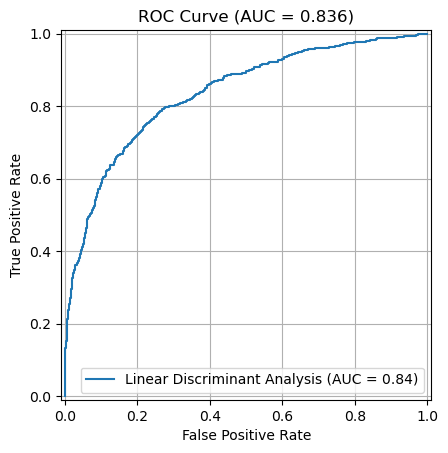

In [536]:

# Get probability estimates for the positive class
y_proba = lda_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Linear Discriminant Analysis').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## ARTIFICAL NEURAL NETWORK

In [539]:
from sklearn.neural_network import MLPClassifier
ann_model = MLPClassifier(random_state=1, max_iter=1000)
ann_model.fit(X_train_final, y_train_smote)

MLPClassifier(max_iter=1000, random_state=1)

In [540]:
artifical_neural_perf_train = model_performance_classification_statsmodels(
    ann_model, X_train_final, y_train_smote
)
artifical_neural_perf_train

,Accuracy,Recall,Precision,F1
0,0.954774,0.96263,0.94774,0.955127


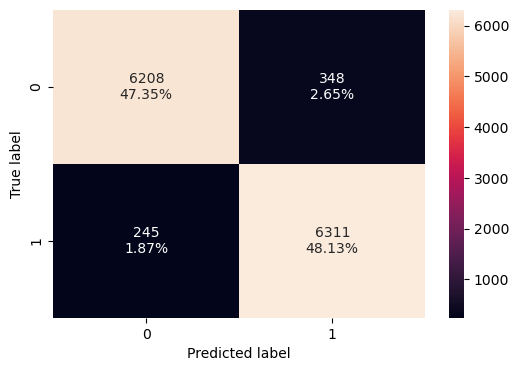

In [541]:
confusion_matrix_statsmodels(ann_model, X_train_final, y_train_smote)

In [542]:
artifical_neural_perf_test = model_performance_classification_statsmodels(
    ann_model, X_test_final, y_test
)
artifical_neural_perf_test

,Accuracy,Recall,Precision,F1
0,0.911486,0.861404,0.690577,0.766589


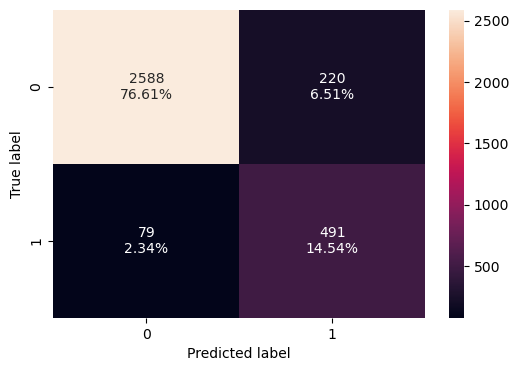

In [543]:
confusion_matrix_statsmodels(ann_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

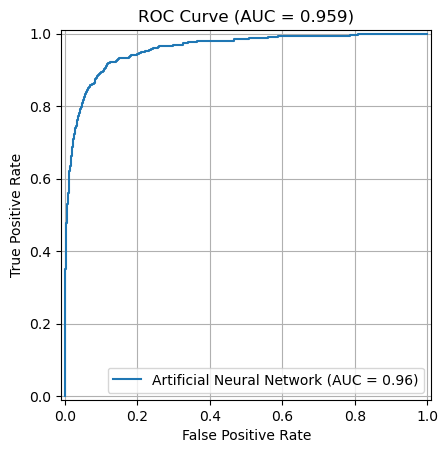

In [544]:
# Get probability estimates for the positive class
y_proba = ann_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Artificial Neural Network').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## SUPPORT VECTOR MACHINE

In [552]:
from sklearn import svm
svm_model = svm.SVC(random_state=1, probability=True)
svm_model.fit(X_train_final, y_train_smote)

SVC(probability=True, random_state=1)

In [553]:
support_vector_perf_train = model_performance_classification_statsmodels(
    svm_model, X_train_final, y_train_smote
)
support_vector_perf_train

,Accuracy,Recall,Precision,F1
0,0.899634,0.913819,0.888609,0.901038


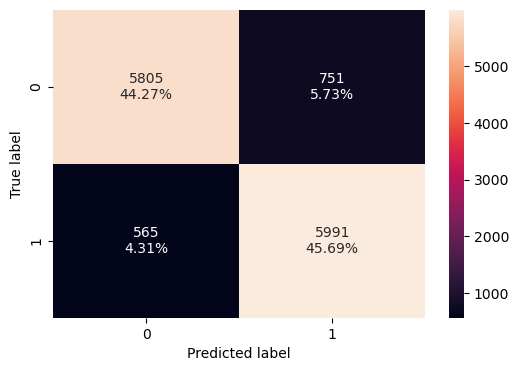

In [554]:
confusion_matrix_statsmodels(svm_model, X_train_final, y_train_smote)

In [555]:
support_vector_perf_test = model_performance_classification_statsmodels(
    svm_model, X_test_final, y_test
)
support_vector_perf_test

,Accuracy,Recall,Precision,F1
0,0.874778,0.84386,0.590184,0.694585


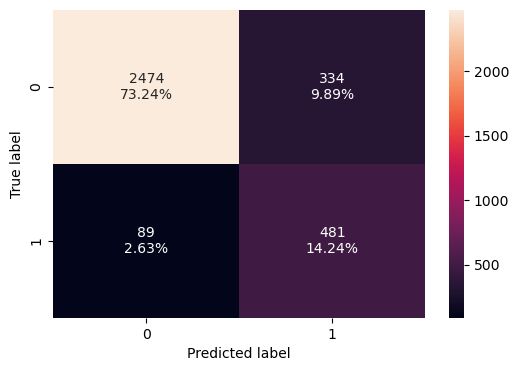

In [556]:
confusion_matrix_statsmodels(svm_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

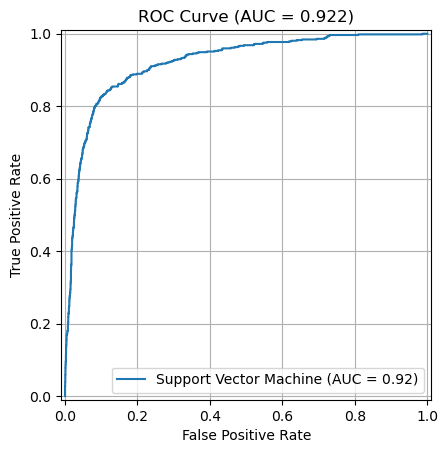

In [557]:
# Get probability estimates for the positive class
y_proba = svm_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Support Vector Machine').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## K-NEAREST NEIGHBOUR MODEL

In [565]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(X_train_final, y_train_smote)

KNeighborsClassifier()

In [567]:
kn_neighbour_perf_train = model_performance_classification_statsmodels(
    knn_model, X_train_final, y_train_smote
)
kn_neighbour_perf_train

,Accuracy,Recall,Precision,F1
0,0.955079,0.97468,0.937913,0.955943


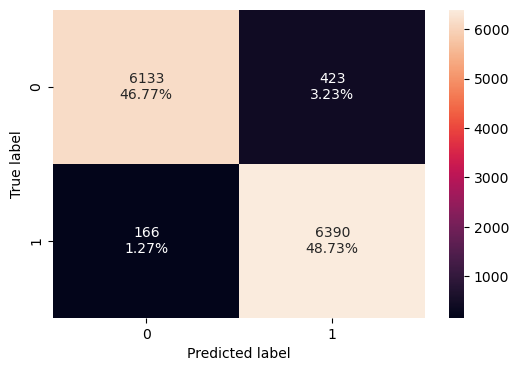

In [568]:
confusion_matrix_statsmodels(knn_model, X_train_final, y_train_smote)

In [569]:
kn_neighbour_perf_test = model_performance_classification_statsmodels(
    knn_model, X_test_final, y_test
)
kn_neighbour_perf_test

,Accuracy,Recall,Precision,F1
0,0.900533,0.915789,0.644444,0.756522


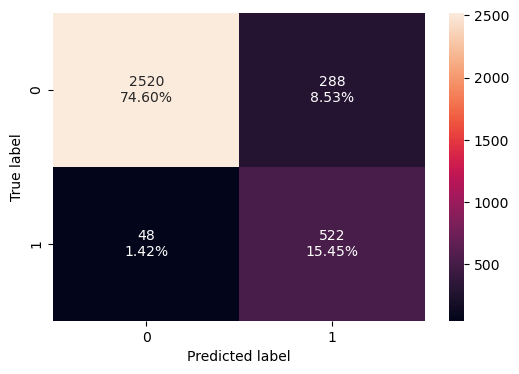

In [570]:
confusion_matrix_statsmodels(knn_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

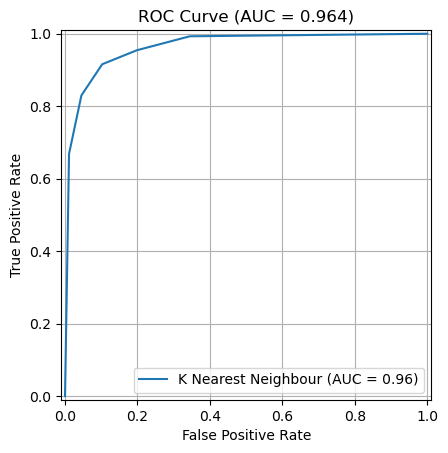

In [571]:
# Get probability estimates for the positive class
y_proba = knn_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='K Nearest Neighbour').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## ENSEMBLE MODELS
## RANDOM FOREST MODEL

In [585]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(X_train_final, y_train_smote)

RandomForestClassifier(random_state=1)

In [586]:
random_forest_perf_train = model_performance_classification_statsmodels(
    rf_model, X_train_final, y_train_smote
)
random_forest_perf_train

,Accuracy,Recall,Precision,F1
0,0.999847,1.0,0.999695,0.999847


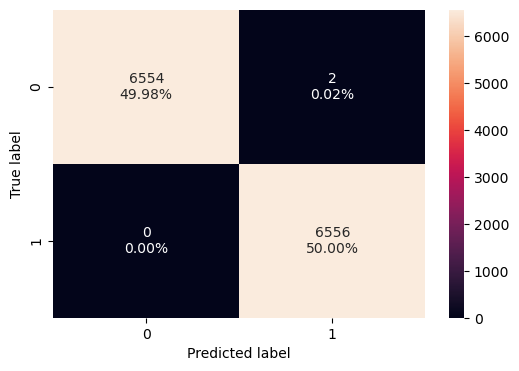

In [587]:
confusion_matrix_statsmodels(rf_model, X_train_final, y_train_smote)

In [588]:
random_forest_perf_test = model_performance_classification_statsmodels(
    rf_model, X_test_final, y_test
)
random_forest_perf_test

,Accuracy,Recall,Precision,F1
0,0.955299,0.885965,0.854484,0.86994


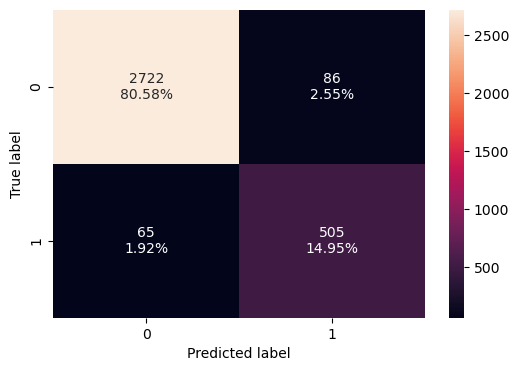

In [589]:
confusion_matrix_statsmodels(rf_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

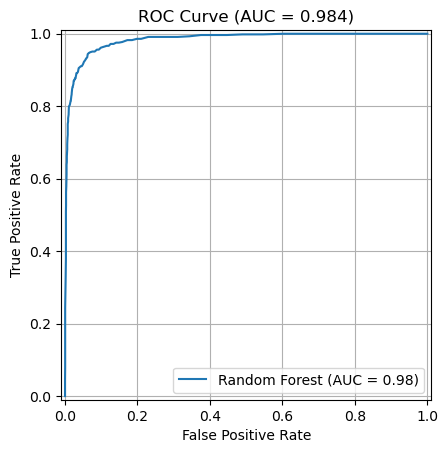

In [590]:
# Get probability estimates for the positive class
y_proba = rf_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## GRADIENT BOOSTING MODEL

In [598]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbm_model.fit(X_train_final, y_train_smote)

GradientBoostingClassifier(random_state=1)

In [599]:
gradient_boosting_perf_train = model_performance_classification_statsmodels(
    gbm_model, X_train_final, y_train_smote
)
gradient_boosting_perf_train

,Accuracy,Recall,Precision,F1
0,0.871263,0.862874,0.877599,0.870174


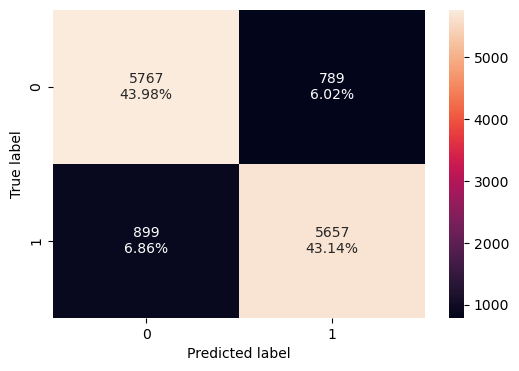

In [600]:
confusion_matrix_statsmodels(gbm_model, X_train_final, y_train_smote)

In [601]:
gradient_boosting_perf_test = model_performance_classification_statsmodels(
    gbm_model, X_test_final, y_test
)
gradient_boosting_perf_test

,Accuracy,Recall,Precision,F1
0,0.865601,0.784211,0.57455,0.663205


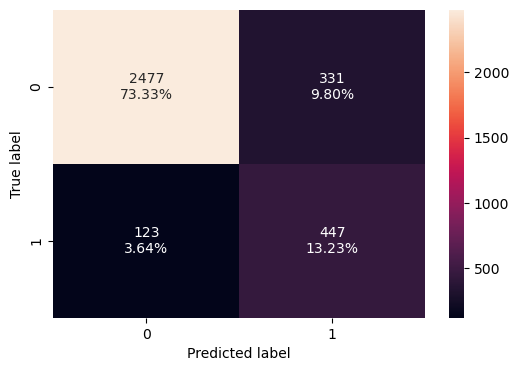

In [602]:
confusion_matrix_statsmodels(gbm_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

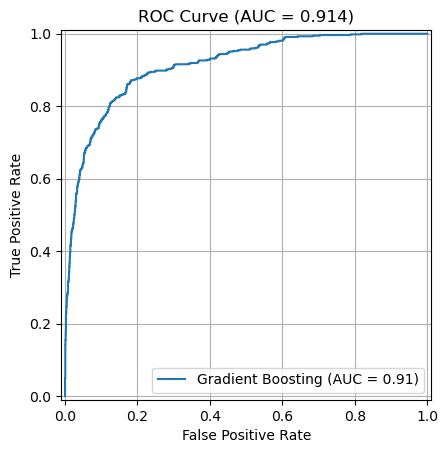

In [603]:
# Get probability estimates for the positive class
y_proba = gbm_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Gradient Boosting').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## ADABOOSTING MODEL

In [611]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=51, random_state=1)
adamodel = ada_model.fit(X_train_final, y_train_smote)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [612]:
ada_boosting_perf_train = model_performance_classification_statsmodels(
    ada_model, X_train_final, y_train_smote
)
ada_boosting_perf_train

,Accuracy,Recall,Precision,F1
0,0.825351,0.816504,0.831211,0.823792


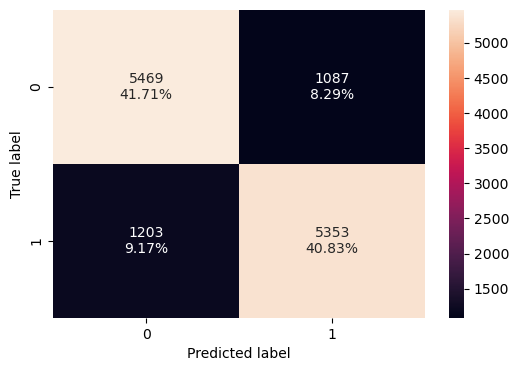

In [613]:
confusion_matrix_statsmodels(ada_model, X_train_final, y_train_smote)

In [615]:
ada_boosting_perf_test = model_performance_classification_statsmodels(
    ada_model, X_test_final, y_test
)
ada_boosting_perf_test

,Accuracy,Recall,Precision,F1
0,0.828597,0.757895,0.494845,0.598753


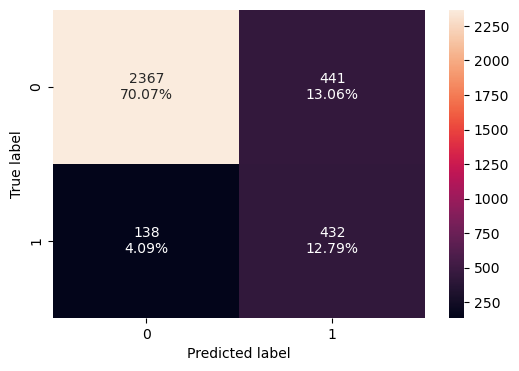

In [617]:
confusion_matrix_statsmodels(ada_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

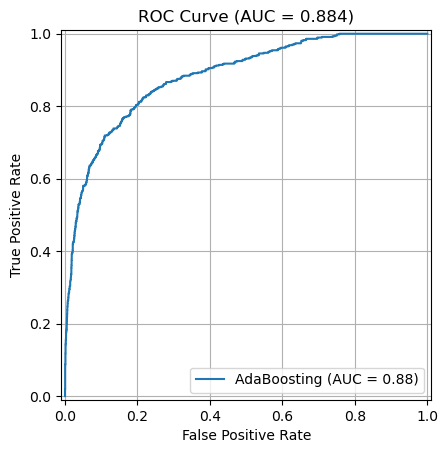

In [618]:
# Get probability estimates for the positive class
y_proba = ada_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='AdaBoosting').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid(True)
plt.show()

## MODEL COMPARISON

In [625]:
# training performance comparison

models_train_comp_df = pd.concat(
    [logistic_reg_perf_train.T,
        decision_tree_perf_train.T,
        linear_discriminant_perf_train.T,
        artifical_neural_perf_train.T,
        support_vector_perf_train.T,
        kn_neighbour_perf_train.T,
        random_forest_perf_train.T,
        gradient_boosting_perf_train.T,
        ada_boosting_perf_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = ["Logistic Regression",
    "Decision Tree",
    "Linear Discriminant Analysis",
    "Artifical Neural Network",
    "Support Vector Machine",
    "K-Nearest Neighbors",
    "Random Forest",
    "Gradient Boosting",
    "Adaboosting",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Decision Tree,Linear Discriminant Analysis,Artifical Neural Network,Support Vector Machine,K-Nearest Neighbors,Random Forest,Gradient Boosting,Adaboosting
Accuracy,0.787752,0.999847,0.783023,0.954774,0.899634,0.955079,0.999847,0.871263,0.825351
Recall,0.813758,0.999847,0.823520,0.962630,0.913819,0.974680,1.000000,0.862874,0.816504
Precision,0.773525,0.999847,0.761817,0.947740,0.888609,0.937913,0.999695,0.877599,0.831211
F1,0.793132,0.999847,0.791468,0.955127,0.901038,0.955943,0.999847,0.870174,0.823792


In [627]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [logistic_reg_perf_test.T,
        decision_tree_perf_test.T,
        linear_discriminant_perf_test.T,
        artifical_neural_perf_test.T,
        support_vector_perf_test.T,
        kn_neighbour_perf_test.T,
        random_forest_perf_test.T,
        gradient_boosting_perf_test.T,
        ada_boosting_perf_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = ["Logistic Regression",
    "Decision Tree",
    "Linear Discriminant Analysis",
    "Artifical Neural Network",
    "Support Vector Machine",
    "K-Nearest Neighbors",
    "Random Forest",
    "Gradient Boosting",
    "Adaboosting",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Decision Tree,Linear Discriminant Analysis,Artifical Neural Network,Support Vector Machine,K-Nearest Neighbors,Random Forest,Gradient Boosting,Adaboosting
Accuracy,0.765246,0.905861,0.745115,0.911486,0.874778,0.900533,0.955299,0.865601,0.828597
Recall,0.784211,0.866667,0.787719,0.861404,0.843860,0.915789,0.885965,0.784211,0.757895
Precision,0.400179,0.671196,0.377628,0.690577,0.590184,0.644444,0.854484,0.574550,0.494845
F1,0.529935,0.756508,0.510517,0.766589,0.694585,0.756522,0.869940,0.663205,0.598753


## MODEL TUNING

## ANN MODEL TUNING

In [769]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(80,), (90,), (100,), (100, 200, 150)],  # Different hidden layer configurations
    'max_iter': [1000, 2000],  # Maximum number of iterations
    'solver': ['sgd', 'adam', 'lbfgs'],  # Optimization algorithms
    'tol': [0.01, 0.001],  # Tolerance for stopping criterion
    'activation': ['identity', 'logistic', 'tanh', 'relu'],  # Activation functions
    'alpha': [0.0001, 0.001, 0.01]  # L2 regularization strength
}
# Initialize the MLPClassifier
mlp = MLPClassifier(random_state=1)

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train_final, y_train_smote)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100, 200, 150), 'max_iter': 1000, 'solver': 'adam', 'tol': 0.001}


In [771]:
tuned_ann_model = MLPClassifier(**grid_search.best_params_, random_state=1,)

tuned_ann_model.fit(X_train_final, y_train_smote)

MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(100, 200, 150),
              max_iter=1000, random_state=1, tol=0.001)

In [773]:
tuned_ann_perf_train = model_performance_classification_statsmodels(
    tuned_ann_model, X_train_final, y_train_smote
)
tuned_ann_perf_train

,Accuracy,Recall,Precision,F1
0,0.998932,0.999847,0.998021,0.998933


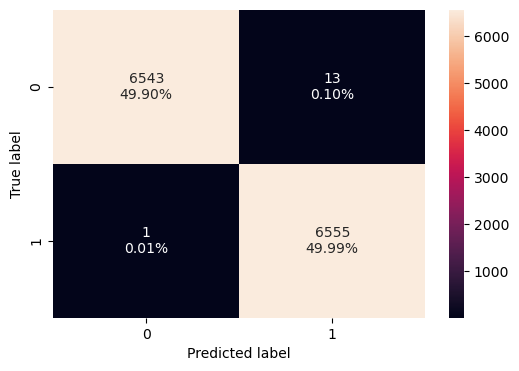

In [775]:
confusion_matrix_statsmodels(tuned_ann_model, X_train_final, y_train_smote)

In [777]:
tuned_ann_perf_test = model_performance_classification_statsmodels(
    tuned_ann_model, X_test_final, y_test
)
tuned_ann_perf_test

,Accuracy,Recall,Precision,F1
0,0.958259,0.922807,0.844302,0.881811


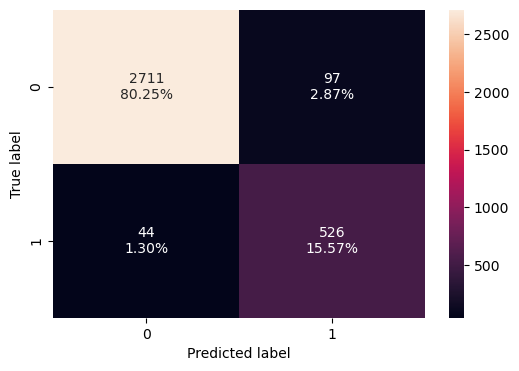

In [779]:
confusion_matrix_statsmodels(tuned_ann_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

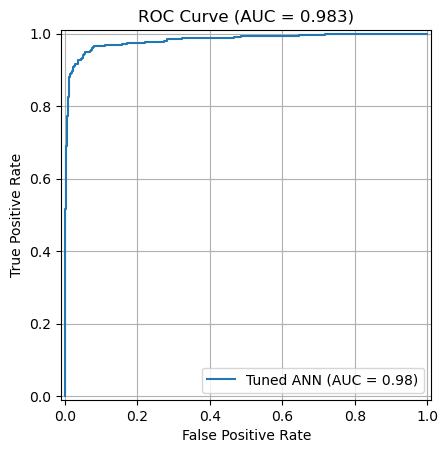

In [781]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Get probability estimates for the positive class
y_proba = tuned_ann_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Tuned ANN').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid()
plt.show();

## RANDOM FOREST MODEL

In [828]:
param_grid = {
    'n_estimators':      [200, 500, 800],            
    'max_depth':         [None, 10, 20, 30],          
    'min_samples_split': [2, 5, 10],                  
    'min_samples_leaf':  [1, 2, 4],                   
    'max_features':      ['sqrt', 'log2'],            
    'class_weight':      ['balanced', 'balanced_subsample', {0:1, 1:5}],
    'criterion':         ['gini', 'entropy']
}
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train_final, y_train_smote)  # Fit the model on training data
# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [830]:
# Train final model using the best parameters
tuned_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
tuned_rf_model.fit(X_train_final, y_train_smote)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       n_estimators=500, random_state=42)

In [878]:
tuned_rf_perf_train = model_performance_classification_statsmodels(
    tuned_rf_model, X_train_final, y_train_smote
)
tuned_rf_perf_train

,Accuracy,Recall,Precision,F1
0,0.999847,1.0,0.999695,0.999847


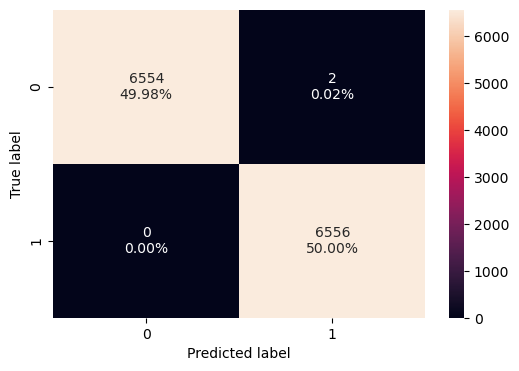

In [880]:
confusion_matrix_statsmodels(tuned_rf_model, X_train_final, y_train_smote)

In [881]:
tuned_rf_perf_test = model_performance_classification_statsmodels(
    tuned_rf_model, X_test_final, y_test
)
tuned_rf_perf_test

,Accuracy,Recall,Precision,F1
0,0.954707,0.889474,0.849246,0.868895


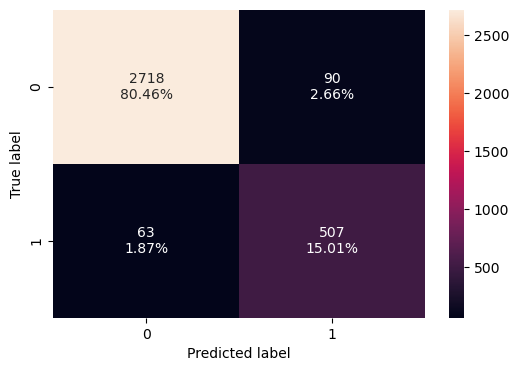

In [883]:
confusion_matrix_statsmodels(tuned_rf_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

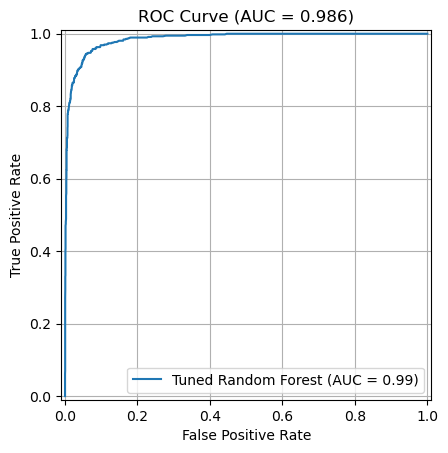

In [886]:
# Get probability estimates for the positive class
y_proba = tuned_rf_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Tuned Random Forest').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid()
plt.show();

## DECISION TREE MODEL

In [755]:
param_grid = {
    'max_depth': [3, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train_final, y_train_smote)

print("Best params:", grid_search.best_params_)

Best params: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [757]:
# Train final model using the best parameters
tuned_dt_model = DecisionTreeClassifier(**grid_search.best_params_, random_state=1)
tuned_dt_model.fit(X_train_final, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)

In [759]:
tuned_dt_perf_train = model_performance_classification_statsmodels(
    tuned_dt_model, X_train_final, y_train_smote
)
tuned_dt_perf_train

,Accuracy,Recall,Precision,F1
0,0.99878,0.998475,0.999084,0.998779


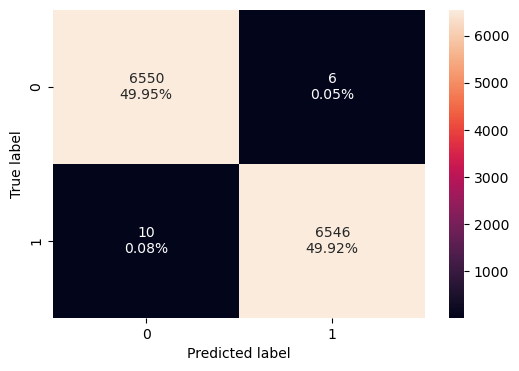

In [761]:
confusion_matrix_statsmodels(tuned_dt_model, X_train_final, y_train_smote)

In [763]:
tuned_dt_perf_test = model_performance_classification_statsmodels(
    tuned_dt_model, X_test_final, y_test
)
tuned_dt_perf_test

,Accuracy,Recall,Precision,F1
0,0.913854,0.845614,0.70365,0.768127


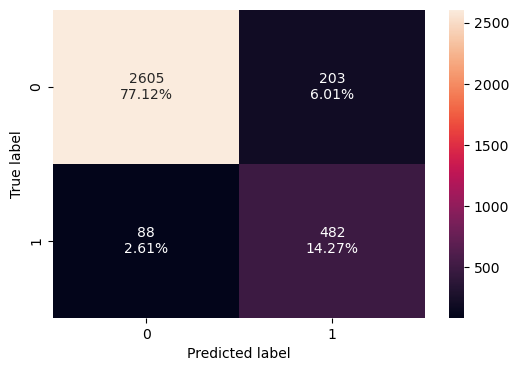

In [765]:
confusion_matrix_statsmodels(tuned_dt_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

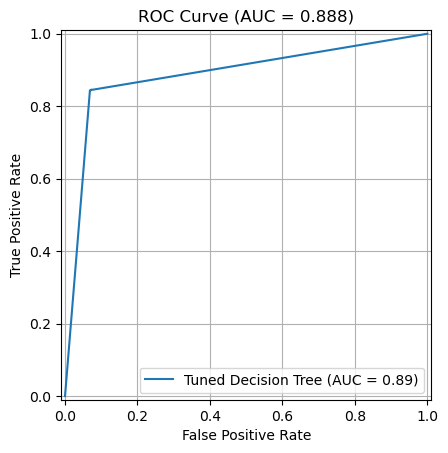

In [767]:
# Get probability estimates for the positive class
y_proba = tuned_dt_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Tuned Decision Tree').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid()
plt.show()

## K-NEAREST NEIGHBOUR MODEL

In [797]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ('knn', KNeighborsClassifier())
])
param_grid = {
  'knn__n_neighbors': [3,5,7,9,11,15],
  'knn__weights': ['uniform','distance'],
  'knn__p': [1,2],
  'knn__leaf_size': [20,30,40],
  'knn__metric': ['minkowski','manhattan','chebyshev']
}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='f1',     # focus on catching all churners
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_final, y_train_smote)
print("Best KNN params:", grid.best_params_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best KNN params: {'knn__leaf_size': 30, 'knn__metric': 'minkowski', 'knn__n_neighbors': 3, 'knn__p': 1, 'knn__weights': 'distance'}


In [803]:
# Train final model using the best parameters
best_knn_params = {
    'n_neighbors': 3,
    'weights': 'distance',
    'p': 1,
    'metric': 'minkowski',
    'leaf_size': 30
}
tuned_knn_model = KNeighborsClassifier(**best_knn_params)
tuned_knn_model.fit(X_train_final, y_train_smote)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [805]:
tuned_knn_perf_train = model_performance_classification_statsmodels(
    tuned_knn_model, X_train_final, y_train_smote
)
tuned_knn_perf_train

,Accuracy,Recall,Precision,F1
0,0.999847,0.999847,0.999847,0.999847


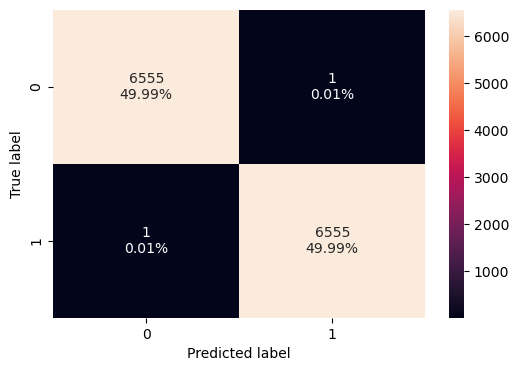

In [807]:
confusion_matrix_statsmodels(tuned_knn_model, X_train_final, y_train_smote)

In [809]:
tuned_knn_perf_test = model_performance_classification_statsmodels(
    tuned_knn_model, X_test_final, y_test
)
tuned_knn_perf_test

,Accuracy,Recall,Precision,F1
0,0.943162,0.94386,0.770774,0.84858


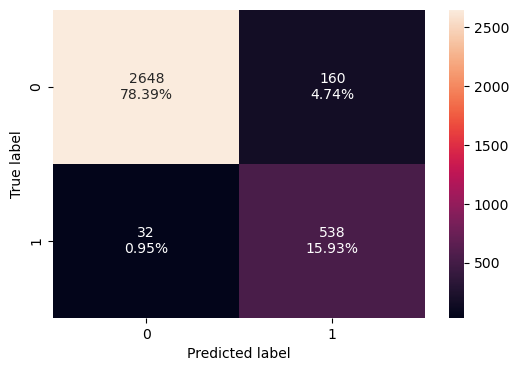

In [811]:
confusion_matrix_statsmodels(tuned_knn_model, X_test_final, y_test)

<Figure size 800x600 with 0 Axes>

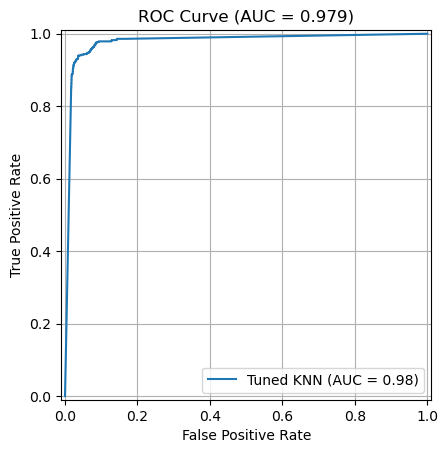

In [813]:
# Get probability estimates for the positive class
y_proba = tuned_knn_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Tuned KNN').plot()
plt.title(f"ROC Curve (AUC = {roc_auc:.3f})")
plt.grid()
plt.show()

## TUNED MODEL COMPARISON

In [842]:
# training performance comparison

models_train_comp_df1 = pd.concat(
    [tuned_ann_perf_train.T,
        tuned_rf_perf_train.T,
        tuned_dt_perf_train.T,
        tuned_knn_perf_train.T
    ],
    axis=1,
)
models_train_comp_df1.columns = ["Tuned Artificial Neural Network",
    "Tuned Random Forest",
    "Tuned Decision Tree",
    "Tuned K-Nearest Neighbours"
]
print("Training performance comparison:")
models_train_comp_df1

Training performance comparison:


,Tuned Artificial Neural Network,Tuned Random Forest,Tuned Decision Tree,Tuned K-Nearest Neighbours
Accuracy,0.998932,0.999847,0.998780,0.999847
Recall,0.999847,1.000000,0.998475,0.999847
Precision,0.998021,0.999695,0.999084,0.999847
F1,0.998933,0.999847,0.998779,0.999847


In [844]:
# testing performance comparison

models_test_comp_df1 = pd.concat(
    [tuned_ann_perf_test.T,
        tuned_rf_perf_test.T,
        tuned_dt_perf_test.T,
        tuned_knn_perf_test.T
    ],
    axis=1,
)
models_test_comp_df1.columns = ["Tuned Artificial Neural Network",
    "Tuned Random Forest",
    "Tuned Decision Tree",
    "Tuned K-Nearest Neighbours"                            
]
print("Testing performance comparison:")
models_test_comp_df1

Testing performance comparison:


,Tuned Artificial Neural Network,Tuned Random Forest,Tuned Decision Tree,Tuned K-Nearest Neighbours
Accuracy,0.958259,0.954707,0.913854,0.943162
Recall,0.922807,0.889474,0.845614,0.943860
Precision,0.844302,0.849246,0.703650,0.770774
F1,0.881811,0.868895,0.768127,0.848580


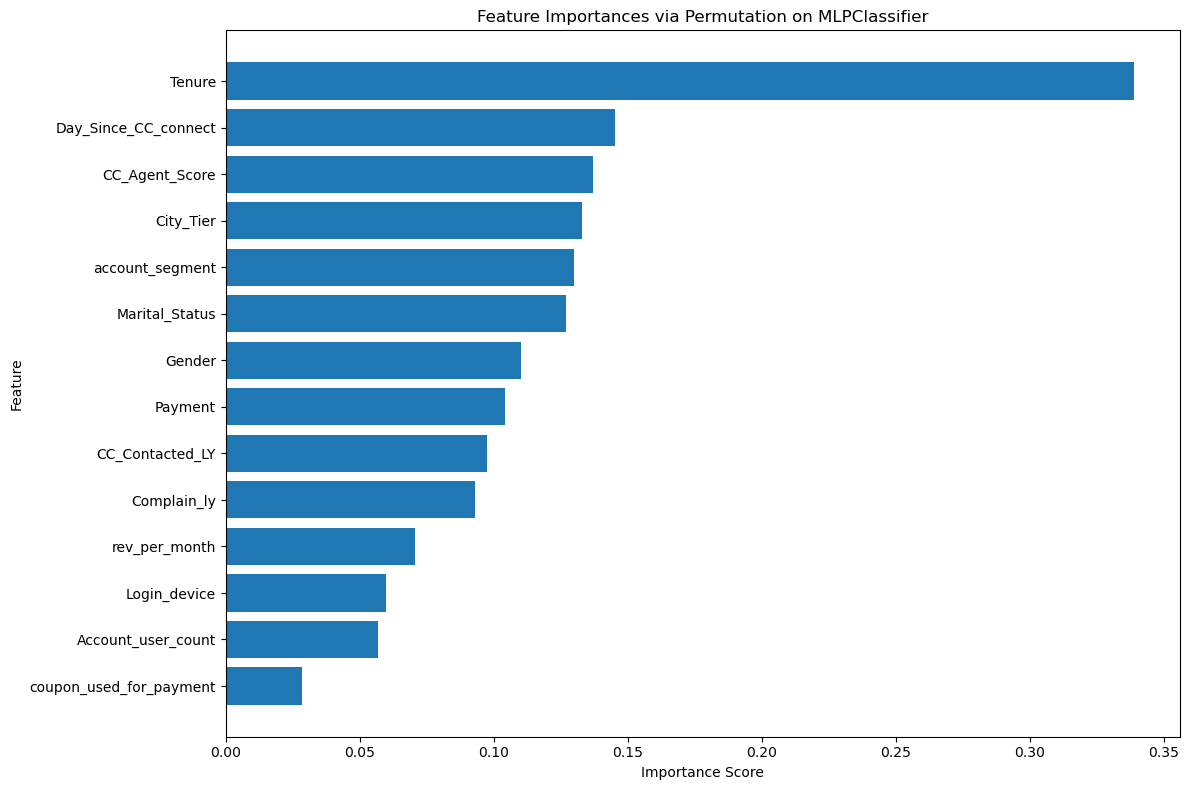

In [866]:
from sklearn.inspection import permutation_importance
result = permutation_importance(tuned_ann_model, X_train_final, y_train_smote,
                                 scoring='recall', n_repeats=10, random_state=42, n_jobs=-1)

# Extract feature importances
importances = result.importances_mean
feature_names = X_train_final.columns

# Sort in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Reverse bar positions to put most important at top
plt.figure(figsize=(12, 8))
plt.title("Feature Importances via Permutation on MLPClassifier")
plt.barh(range(len(sorted_importances)), sorted_importances[::-1], align="center")
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names[::-1])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()